# Fase 1: Obtenció de dades
Es disposa d'un 'dataset' amb 8190 observacions. Corresponen a diversos clients sobre el seu comportament bancari amb les seves targetes de crèdit.

Dataset: https://drive.google.com/uc?id=1szAPTTDZfiEINS7KOeBip7XDdx4_4X-U

El 'dataset' conté 18 característiques, les quals aporten informació sobre el nombre de compres que realitzen concretament:

* CUST_ID: Identificació del titular de la targeta de crèdit
* BALANCE: Import del saldo restant al seu compte per fer compres
* BALANCE_FREQUENCY: Amb quina freqüència s'actualitza el Saldo, puntuació * entre 0 i 1 (1 = "s'actualitza amb freqüència", 0 = "no s'actualitza amb * freqüència")
* PURCHASES: Import de les compres realitzades des del compte
* ONEOFF_PURCHASES: Import màxim de la compra realitzada d'una sola vegada
* INSTALLMENTS_PURCHASES: Import de la compra feta a terminis
* CASH_ADVANCE: Efectiu per avançat donat per l'usuari
* PURCHASES_FREQUENCY: Amb quina freqüència es fan les Compres, puntuació * entre 0 i 1 (1 = compra sovint, 0 = no es compra amb freqüència)
* ONEOFF_PURCHASES_FREQUENCY: Amb quina freqüència es fan les compres d'una * sola vegada (1 = compra freqüent, 0 = no es compra amb freqüència)
* PURCHASES_INSTALLMENTS_FREQUENCY: Amb quina freqüència es fan compres a * terminis (1 = sovint 0 = no es fa amb freqüència)
* CASH_ADVANCE_FREQUENCY: Amb quina freqüència es paga l'efectiu per avançat
* CASH_ADVANCE_TRX: Nombre de transaccions realitzades amb "Efectiu per * avançat"
* PURCHASES_TRX: Nombre de transaccions de compra realitzades
* CREDIT_LIMIT: Límit de la targeta de crèdit per a l'usuari
* PAYMENTS: Import total del pagament ja fet per l'usuari
* MINIMUM_PAYMENTS: Import mínim de pagament efectuat per l'usuari
* PRC_FULL_PAYMENT: Percentatge del càrrec total pagat per l'usuari
* TENURE: Durada del servei de targeta de crèdit per a l'usuari

El teu objectiu és trobar similituds entre els clients i fer agrupacions. Per a aconseguir aquest objectiu hauràs de:


Analitzar les dades fent ús de gràfics per veure amb quines dades estàs treballant.
Tractar els 'outliers', els valors duplicats i els valors 'nulls'.
Fer ús de tècniques d'agrupació provant els algorismes k-means, AGNES i DBSCAN amb les seves corresponents optimitzacions.
Utilitzar mètodes com Elbow, Silhouette, dendrograma, NearestNeighbors... per a trobar, per a cada algorisme, el nombre òptim de clústers.
Decidir quin algorisme aconsegueix un millor rendiment i, a partir d'aquí, fer una gràfica on es vegin els clústers resultants, en 2D i 3D, per a comprovar que hi ha una bona separació dels clústers.
I finalment, analitzar els clústers, tan gràficament com a mode de comentaris.

IMPORTANT: quan facis servir histogrames per a les característiques, podràs observar que la majoria de les característiques disposen d'una distribució asimètrica de les dades, això significa que el gruix important dels valors es troben distribuïts en una sola zona (o cap a l'esquerra o cap a la dreta), és convenient provar si cal normalitzar aquesta distribució perquè els algorismes de 'clustering' treballin millor. Per a fer-ho, una de les tècniques és Box-cox, la qual aplica a tot el 'dataframe' o només a les característiques que ho requereixen, una funció, que aconsegueix una distribució normalitzada de les dades i d'aquesta manera també tracta 'outliers'. Podràs veure la diferència si tornes a utilitzar histogrames després d'aplicar aquesta tècnica a les característiques que ho necessitin. Tingues en compte aquesta tècnica, per si és convenient emprar-la amb algun algorisme.

Entrega un sol quadern 'Colab' amb tot el contingut.

In [ ]:
import pandas as pd
from os.path import exists
from os import makedirs
ruta = '/content/sample_data/IOC/IABD/M2/data'
if not exists(ruta):
    makedirs(ruta)

ruta = ruta+'/banc.csv'

if not exists(ruta):
  !wget -O "/content/sample_data/IOC/IABD/M2/data/banc.csv" "Hiddent address"

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# Importació de les biblioteques
import pandas as pd
banc_df = pd.read_csv('/content/sample_data/IOC/IABD/M2/data/banc.csv')

In [5]:
# Importació de les biblioteques
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Fase 2: Exploració

In [ ]:
print(len(banc_df))

8950


In [ ]:
from collections import Counter
for column in banc_df.columns:
  count = Counter(banc_df[column].values)
  if len(count) < 10:
    print(f"{column} - {len(count)}")
    print(count)

TENURE - 7
Counter({12: 7584, 11: 365, 10: 236, 6: 204, 8: 196, 7: 190, 9: 175})


In [ ]:
banc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
banc_df = banc_df.drop(['CUST_ID'], axis = 1)

In [ ]:
banc_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

# Fase 5: Detecció d'outliers

In [ ]:

col_num = banc_df.select_dtypes(include=['float64', 'int64'])

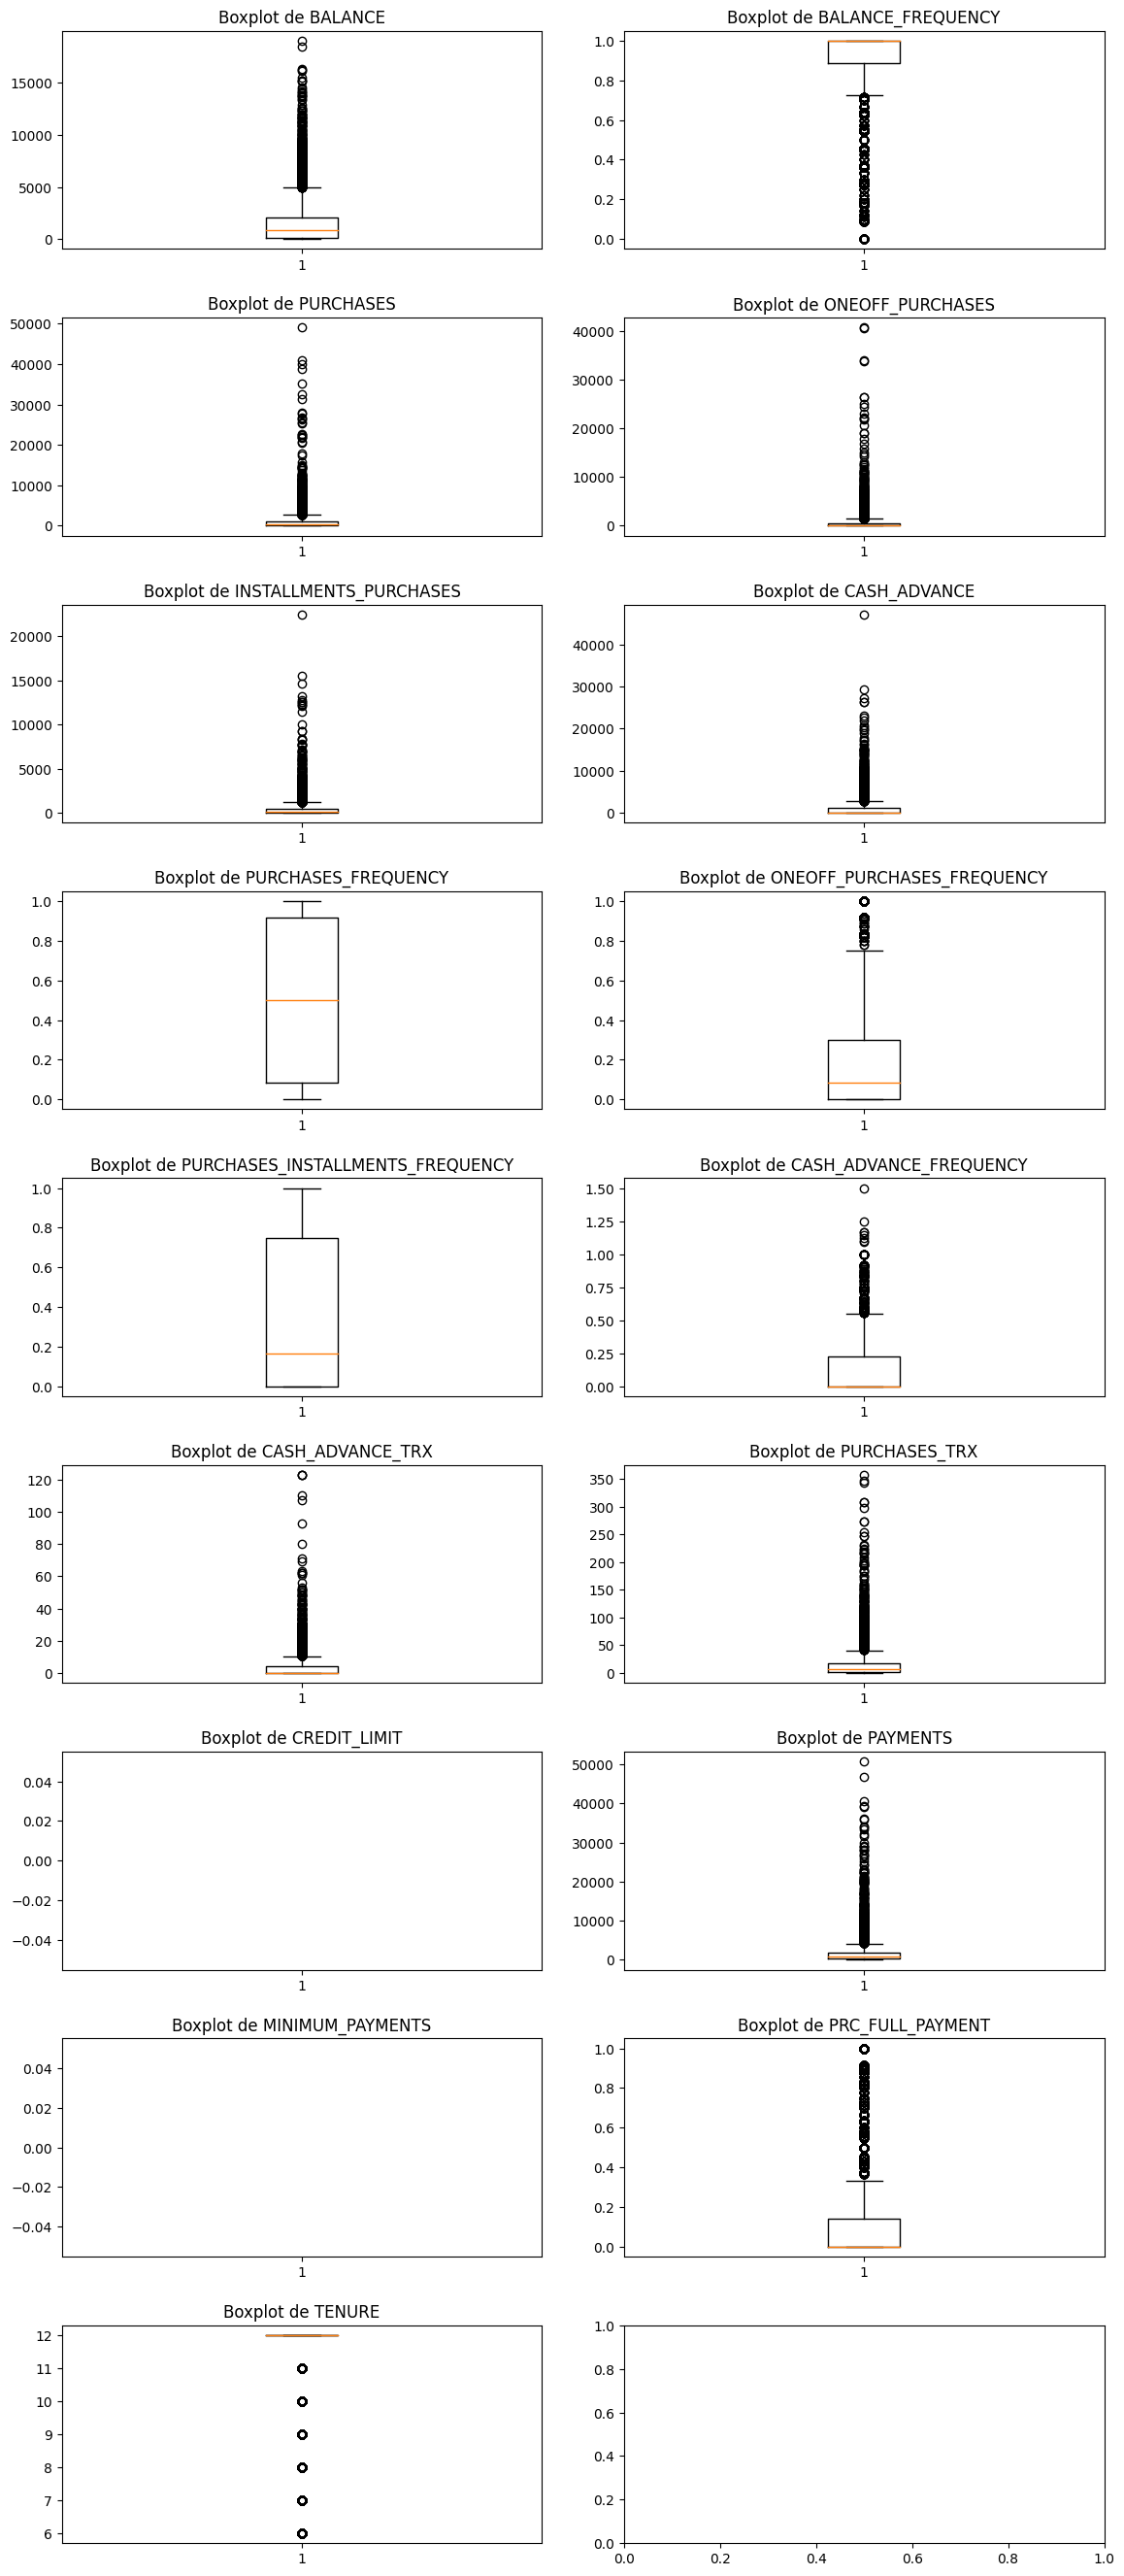

In [ ]:
# Detecció outliers
# Configurar la graella de subplots
num_subplots = len(col_num.columns)
rows = int(num_subplots / 2) + (num_subplots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(12, 3 * rows))
fig.tight_layout(pad=3.0)

# Crear diagrames de caixa més petits i en una graella
for i, col in enumerate(col_num.columns):
    ax = axs[i // 2, i % 2] if num_subplots > 1 else axs
    ax.boxplot(banc_df[col])
    ax.set_title(f'Boxplot de {col}')

plt.show()

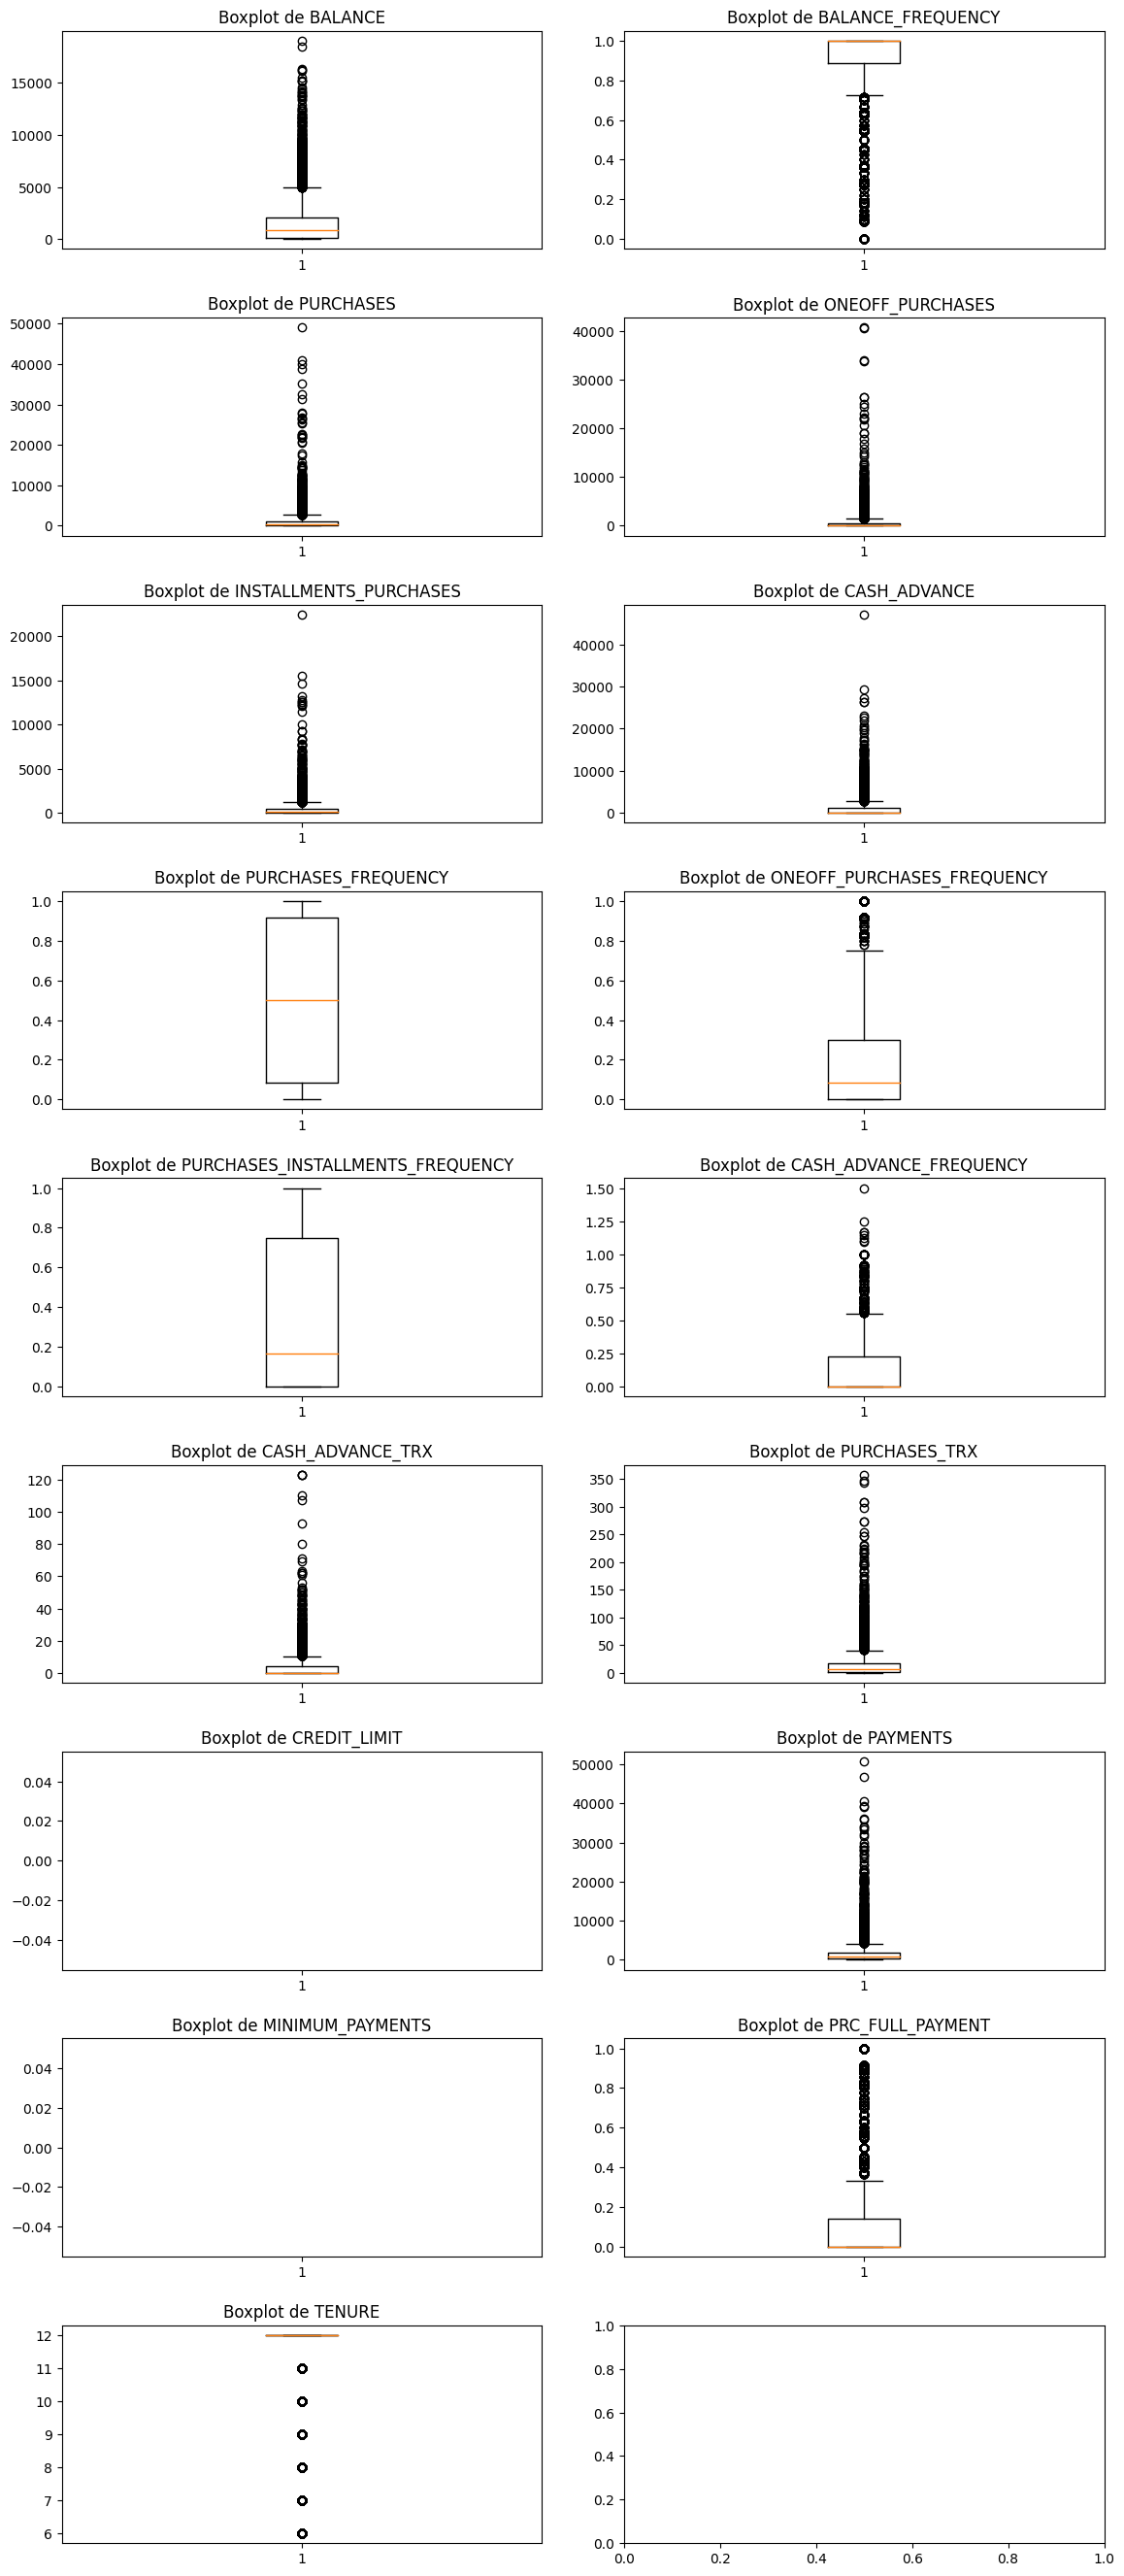

In [ ]:
# Detecció outliers
# Configurar la graella de subplots
num_subplots = len(col_num.columns)
rows = int(num_subplots / 2) + (num_subplots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(12, 3 * rows))
fig.tight_layout(pad=3.0)

# Crear diagrames de caixa més petits i en una graella
for i, col in enumerate(col_num.columns):
    ax = axs[i // 2, i % 2] if num_subplots > 1 else axs
    ax.boxplot(banc_df[col])
    ax.set_title(f'Boxplot de {col}')

plt.show()

# Fase 3: Netejar duplicats, outliers i valors nulls

In [ ]:
# Elimina fileres amb valors null
cleaned_df = banc_df.dropna()
print(f"before {len(banc_df)} after {len(cleaned_df)}")
banc_df = cleaned_df

before 8950 after 8636


In [ ]:
# Comprovar duplicats
duplicates = banc_df[banc_df.duplicated()]
print (duplicates)
if len(duplicates) > 0:
  # Drop duplicated rows
  banc_df = banc_df.drop_duplicates()

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


# Fase 4: Gràfics de dades

In [ ]:
col_num = banc_df.select_dtypes(include=['float64', 'int64'])

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def visualize_continuous_vars(df):
    fig = make_subplots(
        rows=9, cols=2,
        subplot_titles=df.columns,
        row_titles=['']*9,
        column_widths=[0.5, 0.5],  # Ajusta les amplades relatives de les columnes
    )

    variables = df.columns

    for i, variable in enumerate(variables, start=1):
        row = (i - 1) // 2 + 1
        col = (i - 1) % 2 + 1

        fig.add_trace(
            go.Histogram(x=df[variable], name=f'{variable}', marker_color='lightblue'),
            row=row, col=col
        )

    fig.update_layout(
        height=1500,  # Ajusta l'altura segons sigui necessari
        width=1000,   # Ajusta l'amplada segons sigui necessari
        title_text=f"Distribució de Variables Contínues",
        template='simple_white'
    )

    fig.update_traces(
        marker_line_color='black',
        marker_line_width=1.5,
        opacity=0.8
    )

    # Ajusta l'espai entre les barres dels histogrames
    fig.update_layout(bargap=0.1)

    fig.show()
visualize_continuous_vars(banc_df)

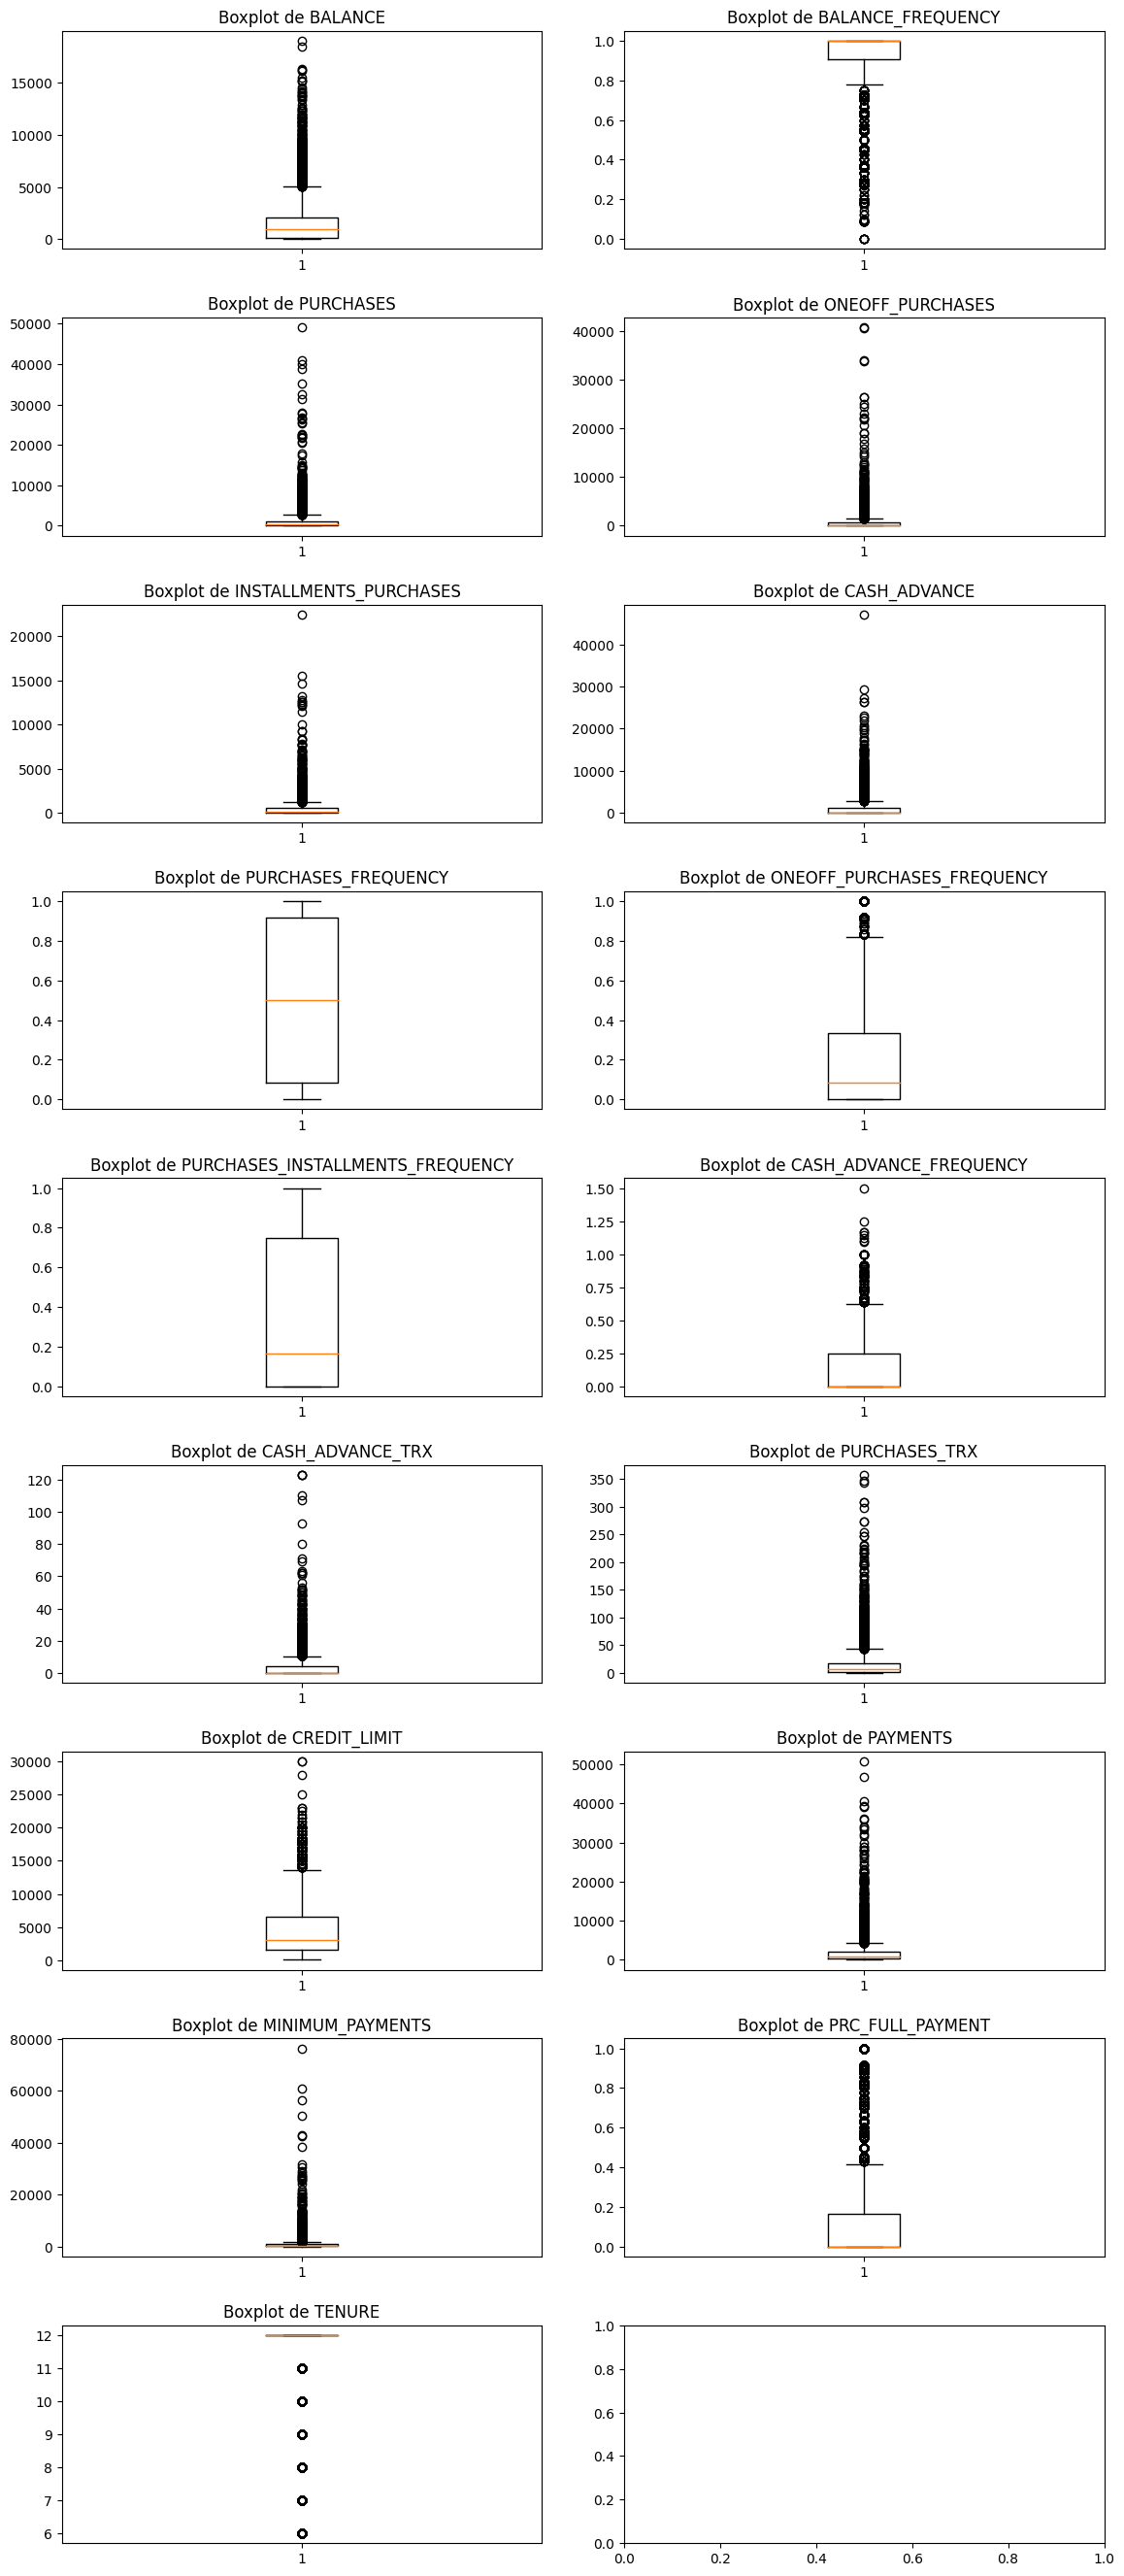

In [ ]:
# Detecció outliers
# Configurar la graella de subplots
num_subplots = len(col_num.columns)
rows = int(num_subplots / 2) + (num_subplots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(12, 3 * rows))
fig.tight_layout(pad=3.0)

# Crear diagrames de caixa més petits i en una graella
for i, col in enumerate(col_num.columns):
    ax = axs[i // 2, i % 2] if num_subplots > 1 else axs
    ax.boxplot(banc_df[col])
    ax.set_title(f'Boxplot de {col}')

plt.show()

# Fase 5: Detecció d'outliers

In [ ]:

col_num = banc_df.select_dtypes(include=['float64', 'int64'])

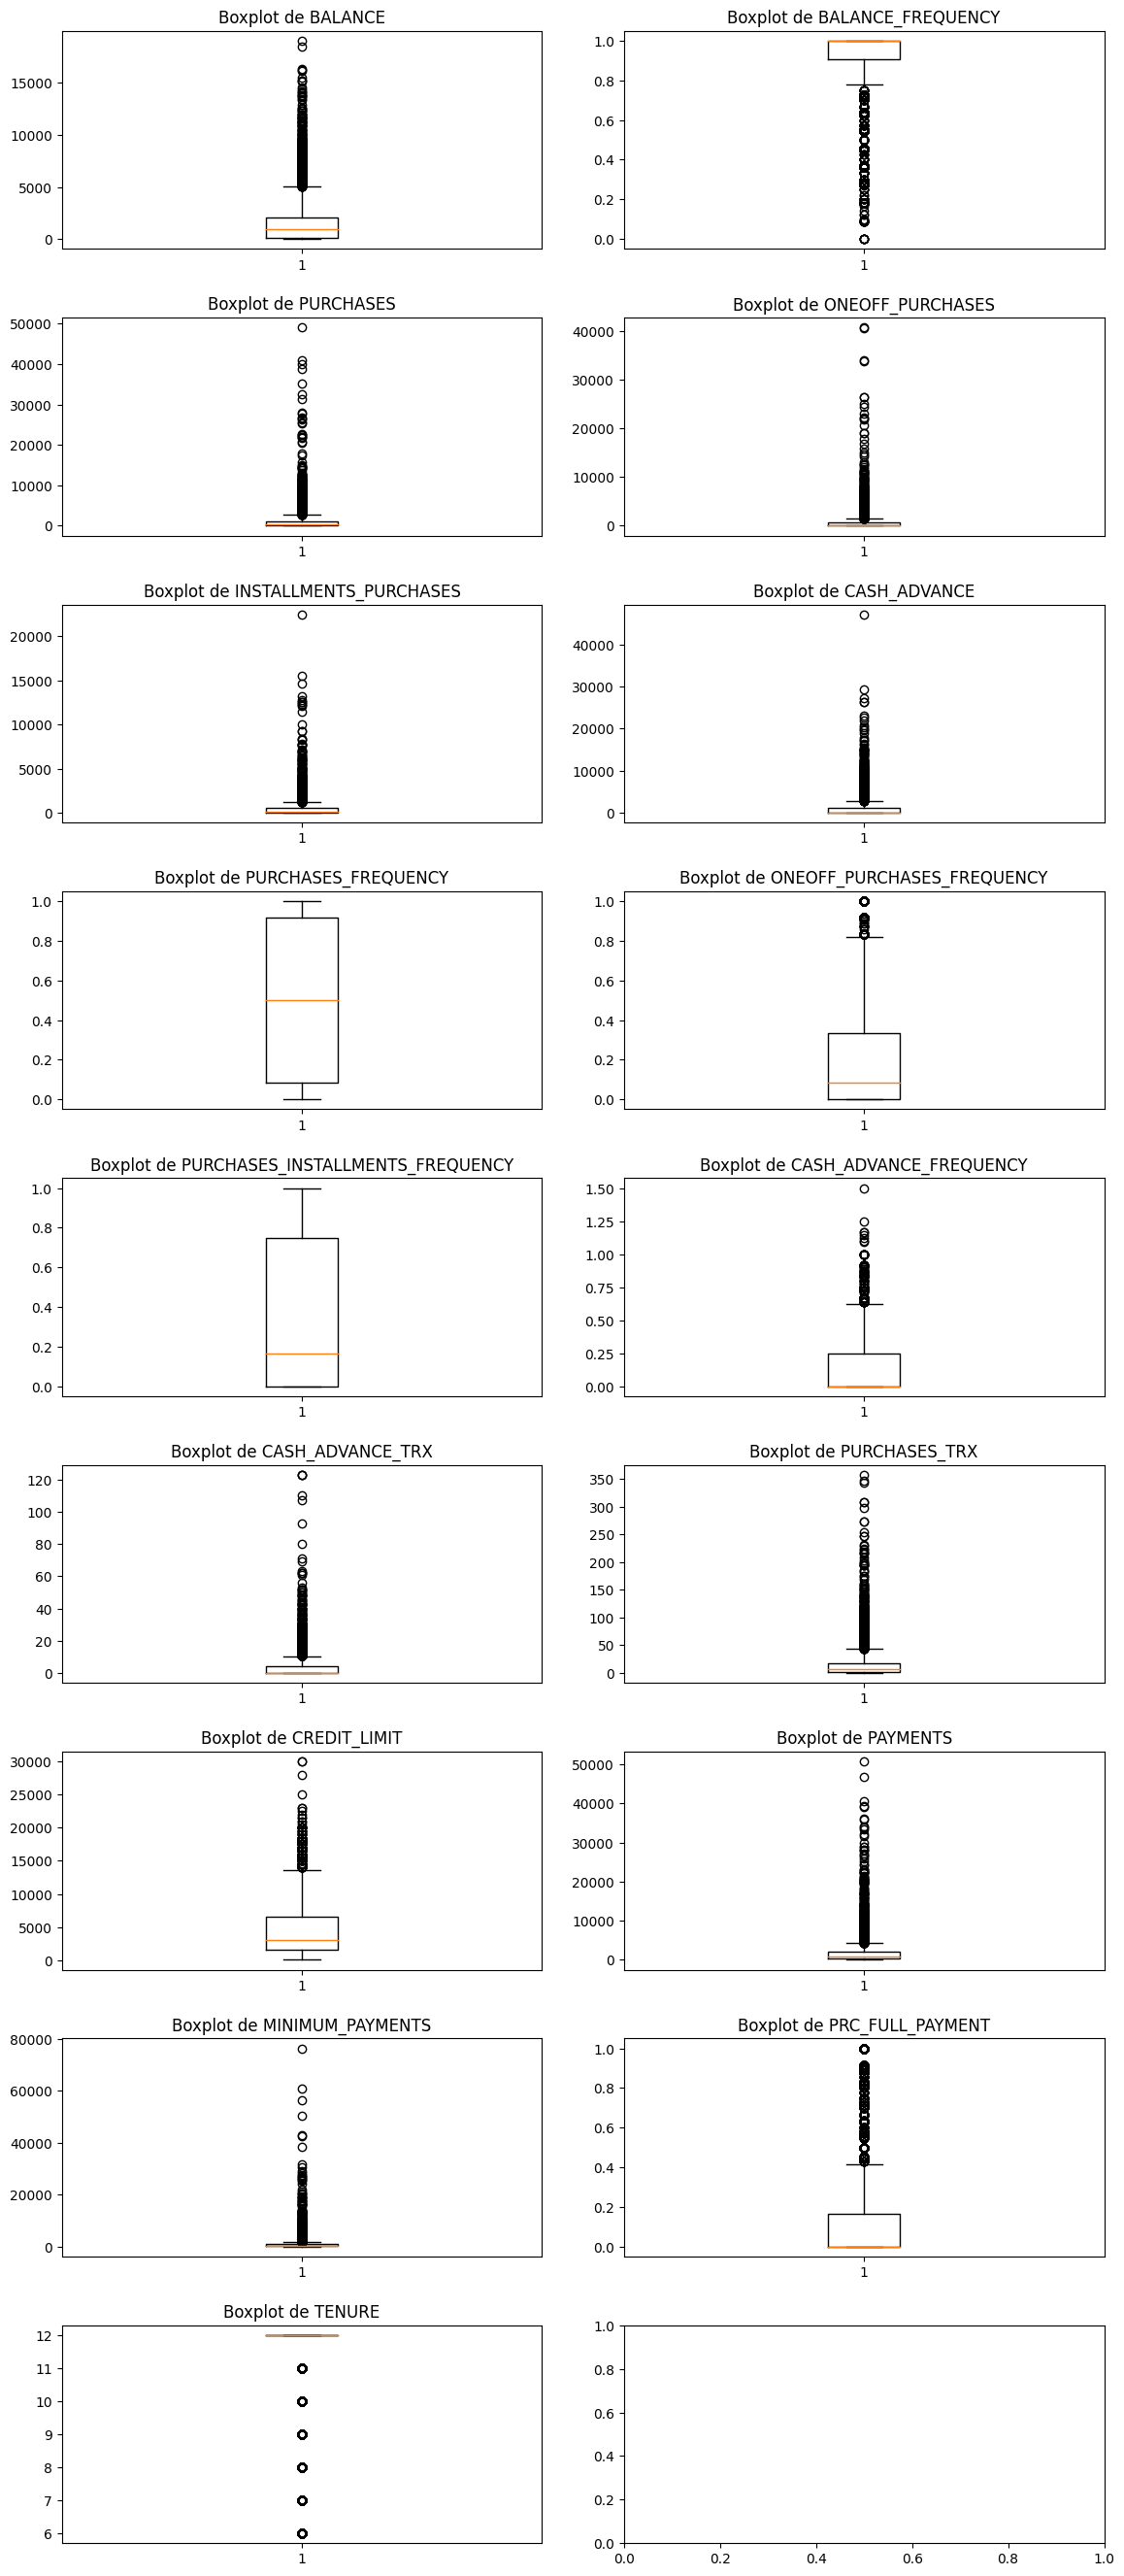

In [ ]:
# Detecció outliers
# Configurar la graella de subplots
num_subplots = len(col_num.columns)
rows = int(num_subplots / 2) + (num_subplots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(12, 3 * rows))
fig.tight_layout(pad=3.0)

# Crear diagrames de caixa més petits i en una graella
for i, col in enumerate(col_num.columns):
    ax = axs[i // 2, i % 2] if num_subplots > 1 else axs
    ax.boxplot(banc_df[col])
    ax.set_title(f'Boxplot de {col}')

plt.show()

# Fase 6: Entrenament del model i realització de prediccions

In [ ]:
"""
n_clusters per a provar 4

n_init 10 l'algoritme K-Means s'iniciarà 10 vegades amb centroides inicials diferents,
i es seleccionarà el model que tingui la inèrcia (suma de les distàncies quadrades dins del clúster) més baixa

max_iter 500 l'algoritme K-Means intentarà ajustar els centroides fins a un màxim de 500 iteracions per cada inicialització.
Això pot ser útil en conjunts de dades on l'algoritme podria trigar més temps a convergir o on es vol limitar el temps d'execució

init k-means++ determina la manera com s'inicialitzen els centroids. En aquest cas és la inicialització predeterminada millorada

algoritme lloyd especifica l'algoritme utilitzat per calcular els clústers

Pot ser "k-means", "elkan". "Lloyd" equival a k-means intentarà seleccionar la millor opció basant-se en les dades d'entrada
No caldria és el per defecte
"""
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', max_iter=500, random_state=42, algorithm='lloyd')
kmeans_labels = kmeans.fit_predict(banc_df)
banc_df['kmeans_labels'] = kmeans_labels

<ipython-input-393-f2ca41a762af>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
banc_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  kmeans_labels  
0      201.802084        139.509787          0.000000      12              1  
1     4103.032597       1072.340217          0.222222      12              0  
2      622.066742        627.284787          0.000000      12              0  
4      678.334763        244.791237          0.000000      12              1  
5     1400.057770       2407.246035          0.000000      12              1  
...           ...               ...               ...     ...            ...  
8943    58.644883         43.4737

# Fase 7: Validació model

In [ ]:
# Càlcul de mètriques internes
X_features = banc_df.drop(['kmeans_labels'], axis = 1)

# Calcula el coeficient de silhouette
silhouette = silhouette_score(X_features, banc_df['kmeans_labels'])
print(f"Silhouette Score: {silhouette}")

# Calcula el coeficient de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_features, banc_df['kmeans_labels'])
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calcula el coeficient de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_features, banc_df['kmeans_labels'])
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Obtenir l'inèrcia (SSE)
inertia = kmeans.inertia_

# Imprimeix l'inèrcia
print(f"Inèrcia (SSE): {inertia}")

Silhouette Score: 0.3896747465983954
Davies-Bouldin Score: 1.3116815238229287
Calinski-Harabasz Score: 2594.1930599941265
Inèrcia (SSE): 203221622217.05634


# Fase 8: Optimització i execució

In [ ]:
# Netejar kmeans per realitzar mes probes
banc_df = banc_df.drop(['kmeans_labels'], axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crea una instància del MinMaxScaler
scaler = MinMaxScaler()

# Càlcul de mètriques internes

# Fit i transforma les característiques (X_features) amb MinMaxScaler
X_features = scaler.fit_transform(banc_df)

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', max_iter=500, random_state=42, algorithm='lloyd')
kmeans_labels = kmeans.fit_predict(X_features)
banc_df['kmeans_labels'] = kmeans_labels

# Fase 7: Validació model

In [ ]:


# Calcula el coeficient de silhouette
silhouette = silhouette_score(X_features, banc_df['kmeans_labels'])
print(f"Silhouette Score: {silhouette}")

# Calcula el coeficient de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_features, banc_df['kmeans_labels'])
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calcula el coeficient de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_features, banc_df['kmeans_labels'])
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Obtenir l'inèrcia (SSE)
inertia = kmeans.inertia_

# Imprimeix l'inèrcia
print(f"Inèrcia (SSE): {inertia}")

Silhouette Score: 0.3765950795433067
Davies-Bouldin Score: 1.201298257631957
Calinski-Harabasz Score: 3837.8589887451044
Inèrcia (SSE): 2416.1654993579523


# Fase 8: Optimització

In [ ]:
# Netejar kmeans per realitzar mes probes
banc_df = banc_df.drop(['kmeans_labels'], axis = 1)

In [ ]:
# Creació d'una funció per a trobar el valor òptim per a k
def visualize_silhouette(model, cluster_lists, X_features):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        cluster = KMeans(n_clusters=n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = cluster.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster: '+str(n_cluster) + ' Silhouette Score: '+ str(round(sil_avg,3)),
                           fontsize=10)
        axs[ind].set_xlabel('The silhouette coefficient value')

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color=  cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

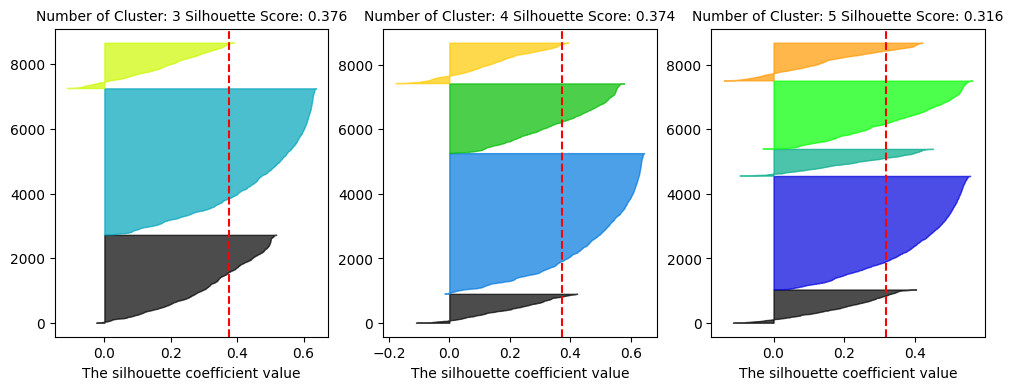

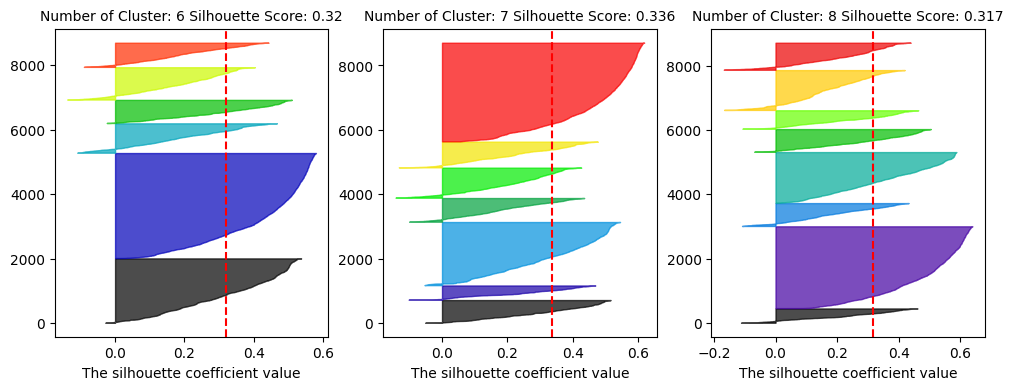

In [ ]:
"""
Alçada de cada "ganivet" indica nombre instàncies
Amplada indica els coefeicients
La ratlla discontínua indica la puntuació promig de Silhouette per cada clúster
Tots els clústers han de passar-la, si no, no es consideren bons
"""
visualize_silhouette('KMeans', [3,4,5], X_features)
visualize_silhouette('KMeans', [6,7,8], X_features)

Cuartil 1 (Q1): 0.25
Cuartil 3 (Q3): 1.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número d'outliers: 0


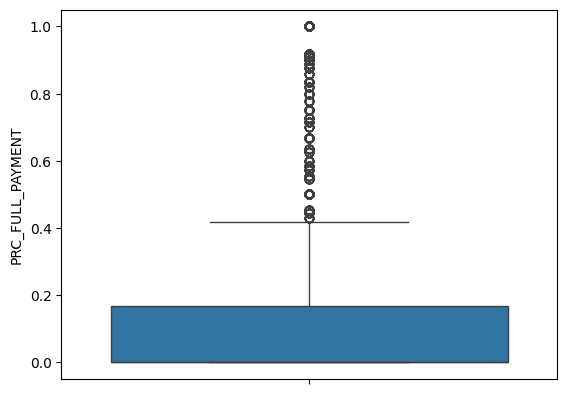

In [ ]:
# visualtizar outliers molt clars

sns.boxplot(data=banc_df['PRC_FULL_PAYMENT'])

# Calcular els quartils
Q1 = np.percentile(banc_df['PRC_FULL_PAYMENT'], 80)
Q3 = np.percentile(banc_df['PRC_FULL_PAYMENT'], 100)

# Calcular l'ample interquartílic (IQR)
IQR = Q3 - Q1

# Definir límits per identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = (banc_df['PRC_FULL_PAYMENT'] < lower_limit) | (banc_df['PRC_FULL_PAYMENT'] > upper_limit)

# Imprimir informació
print(f"Cuartil 1 (Q1): {Q1}")
print(f"Cuartil 3 (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Límit inferior: {lower_limit}")
print(f"Límit superior: {upper_limit}")
print(f"Número d'outliers: {sum(outliers)}")

In [ ]:
def print_outliers(df, col_dict, threshold = 1.5):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # obtenir dades
    column = col_dict['column']
    Q1_percentage = col_dict['Q1']
    Q3_percentage = col_dict['Q3']

    # Calcular quartiles
    Q1 = np.percentile(df[column], Q1_percentage)
    Q3 = np.percentile(df[column], Q3_percentage)

    # Configurar el tauler per a visualitzar múltiples gràfics
    plt.figure(figsize=(4, 2))

    # Crear subplots
    fig, ax = plt.subplots(1, 1, figsize=(4, 2))
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel(None) # eliminar per visualitzar millor

    # afegir llegenda
    ax.legend()

    plt.tight_layout()

    # Calculem el rang interquartílic
    iqr = Q3 - Q1

    # Definim els límits per identificar outliers
    lower_bound = Q1 - threshold * iqr
    upper_bound = Q3 + threshold * iqr

    print(f"min value ={df[column].min()}")
    print(f"max value ={df[column].max()}")


    outliers = (df[column] < lower_limit) | (df[column] > upper_limit)

    # Imprimir informació
    print(f"Column: {Q1}")
    print(f"Quartil 1 (Q1): {Q1}")
    print(f"Quartil 3 (Q3): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límit inferior: {lower_limit}")
    print(f"Límit superior: {upper_limit}")
    print(f"Número elements: {len(df[column])}")
    print(f"Número d'outliers: {sum(outliers)}")
    plt.show()

In [ ]:
columns_to_remove_outliers = [
    {'column': 'PRC_FULL_PAYMENT', 'Q1': 30, 'Q3': 55},
    {'column': 'CREDIT_LIMIT', 'Q1': 45, 'Q3': 55},
    {'column': 'CASH_ADVANCE_FREQUENCY', 'Q1': 25, 'Q3': 75},
    {'column': 'ONEOFF_PURCHASES_FREQUENCY', 'Q1': 35, 'Q3': 65},
    {'column': 'BALANCE', 'Q1': 35, 'Q3': 65},
    {'column': 'BALANCE_FREQUENCY', 'Q1': 55, 'Q3': 60}
]

min value =0.0
max value =1.0
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

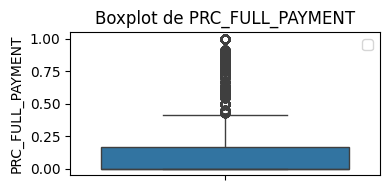

min value =50.0
max value =30000.0
Column: 3000.0
Quartil 1 (Q1): 3000.0
Quartil 3 (Q3): 4000.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 8636


<Figure size 400x200 with 0 Axes>

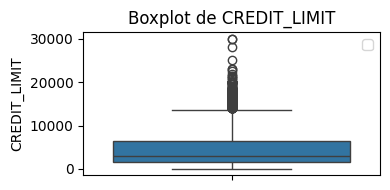

min value =0.0
max value =1.5
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.25
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

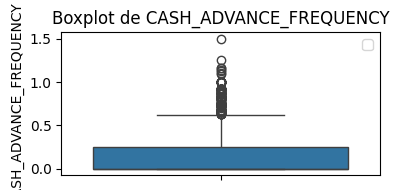

min value =0.0
max value =1.0
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.166667
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

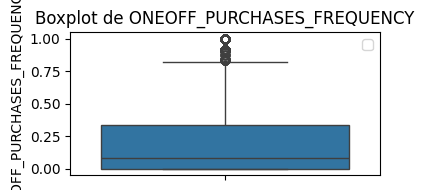

min value =0.0
max value =19043.13856
Column: 364.415157
Quartil 1 (Q1): 364.415157
Quartil 3 (Q3): 1471.37448125
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 8559


<Figure size 400x200 with 0 Axes>

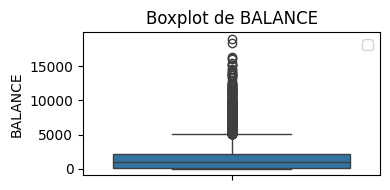

min value =0.0
max value =1.0
Column: 1.0
Quartil 1 (Q1): 1.0
Quartil 3 (Q3): 1.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 8636
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

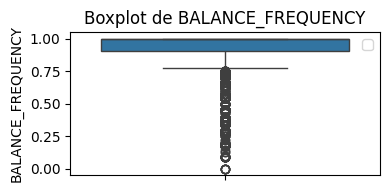

In [ ]:
for col in columns_to_remove_outliers:
  print_outliers(banc_df, col)


In [ ]:
import numpy as np

def remove_outliers(df, columns_to_remove_outliers, threshold=1.5):
    """
    Elimina els outliers d'un DataFrame utilitzant el rang interquartílic (IQR).

    Parameters:
    - df: DataFrame
    - columns_to_remove_outliers: Llista de diccionaris amb les columnes i els percentatges dels quartils Q1 i Q3.
    - threshold: Umbral per considerar un punt com a outlier (per defecte, 1.5).
    """
    cleaned = df
    for col_dict in columns_to_remove_outliers:
        # obtenir informació
        col = col_dict['column']
        Q1_percentage = col_dict['Q1']
        Q3_percentage = col_dict['Q3']

        # Calcular quadratics
        Q1 = np.percentile(banc_df[column], Q1_percentage)
        Q3 = np.percentile(banc_df[column], Q3_percentage)

        # Calculem el rang interquartílic
        q1 = df[col].quantile(Q1_percentage/100)
        q3 = df[col].quantile(Q3_percentage/100)
        iqr = q3 - q1

        # Definim els límits per identificar outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Eliminem els outliers
        cleaned = cleaned[(cleaned[col] >= lower_bound) & (cleaned[col] <= upper_bound)]

        print(f"{col} cleaned {len(df[col]) - len(cleaned[col])}")

    return cleaned




In [ ]:
# Usage
df_cleaned = remove_outliers(banc_df, columns_to_remove_outliers)

PRC_FULL_PAYMENT cleaned 3047
CREDIT_LIMIT cleaned 5747
CASH_ADVANCE_FREQUENCY cleaned 5841
ONEOFF_PURCHASES_FREQUENCY cleaned 6156
BALANCE cleaned 6368
BALANCE_FREQUENCY cleaned 6997


min value =0.0
max value =0.0
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

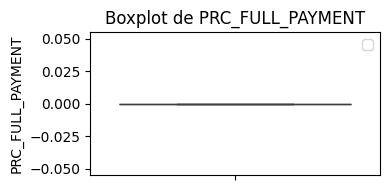

min value =1500.0
max value =5500.0
Column: 2500.0
Quartil 1 (Q1): 2500.0
Quartil 3 (Q3): 2500.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 1639


<Figure size 400x200 with 0 Axes>

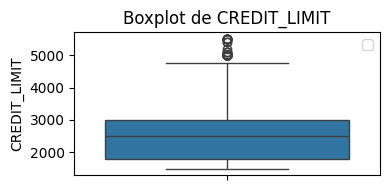

min value =0.0
max value =0.625
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.25
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

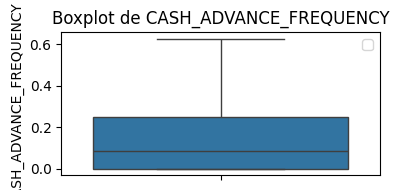

min value =0.0
max value =0.416667
Column: 0.0
Quartil 1 (Q1): 0.0
Quartil 3 (Q3): 0.083333
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

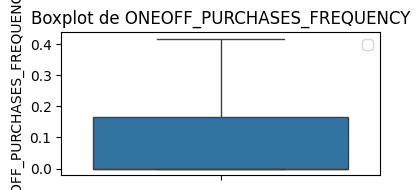

min value =1.691842
max value =3130.53708
Column: 1242.9956736
Quartil 1 (Q1): 1242.9956736
Quartil 3 (Q3): 1726.9442508000002
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 1638


<Figure size 400x200 with 0 Axes>

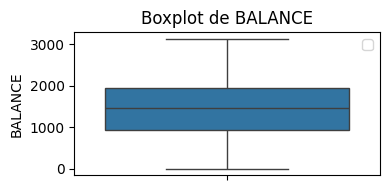

min value =1.0
max value =1.0
Column: 1.0
Quartil 1 (Q1): 1.0
Quartil 3 (Q3): 1.0
IQR: 0.75
Límit inferior: -0.875
Límit superior: 2.125
Número elements: 1639
Número d'outliers: 0


<Figure size 400x200 with 0 Axes>

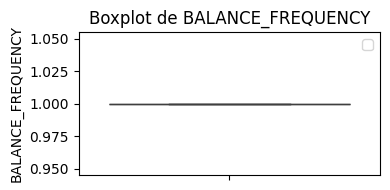

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5     1809.828751                1.0    1333.28               0.0   
7     1823.652743                1.0     436.20               0.0   
14    2772.772734                1.0       0.00               0.0   
20    2016.684686                1.0     176.68               0.0   
25     169.781679                1.0     399.60               0.0   
...           ...                ...        ...               ...   
8777  2532.816831                1.0       0.00               0.0   
8844  1191.014802                1.0     590.80             590.8   
8881  2150.940844                1.0    1105.74               0.0   
8896  1117.594403                1.0     291.62               0.0   
8917  1880.817982                1.0       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5                    1333.28      0.000000             0.666667   
7                     436.20      0.000000             1.000000   
14                      0.00    346.811390             0.000000   
20                    176.68      0.000000             0.666667   
25                    399.60      0.000000             1.000000   
...                      ...           ...                  ...   
8777                    0.00   2640.226004             0.000000   
8844                    0.00   1040.908414             0.142857   
8881                 1105.74   2220.336732             1.000000   
8896                  291.62   1596.771919             1.000000   
8917                    0.00   2335.949930             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5                       0.000000                          0.583333   
7                       0.000000                          1.000000   
14                      0.000000                          0.000000   
20                      0.000000                          0.666667   
25                      0.000000                          1.000000   
...                          ...                               ...   
8777                    0.000000                          0.000000   
8844                    0.142857                          0.000000   
8881                    0.000000                          0.857143   
8896                    0.000000                          0.857143   
8917                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5                   0.000000                 0              8        1800.0   
7                   0.000000                 0             12        2300.0   
14                  0.083333                 1              0        3000.0   
20                  0.000000                 0              8        2000.0   
25                  0.000000                 0             12        3000.0   
...                      ...               ...            ...           ...   
8777                0.250000                 5              0        3000.0   
8844                0.142857                 3              3        3000.0   
8881                0.142857                 7             13        2500.0   
8896                0.142857                 2              7        2000.0   
8917                0.333333                 5              0        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5     1400.057770       2407.246035               0.0      12  
7      679.065082        532.033990               0.0      12  
14     805.647974        989.962866               0.0      12  
20     223.068600      13557.297260               0.0      12  
25     215.306142        163.005536               0.0      12  
...           ...               ...               ...     ...  
8777   367.673648        420.892534               0.0       8  
8844   476.484106        165.145689               0.0       7  
8881   631

In [ ]:
for col in columns_to_remove_outliers:
  print_outliers(df_cleaned, col)
df_cleaned

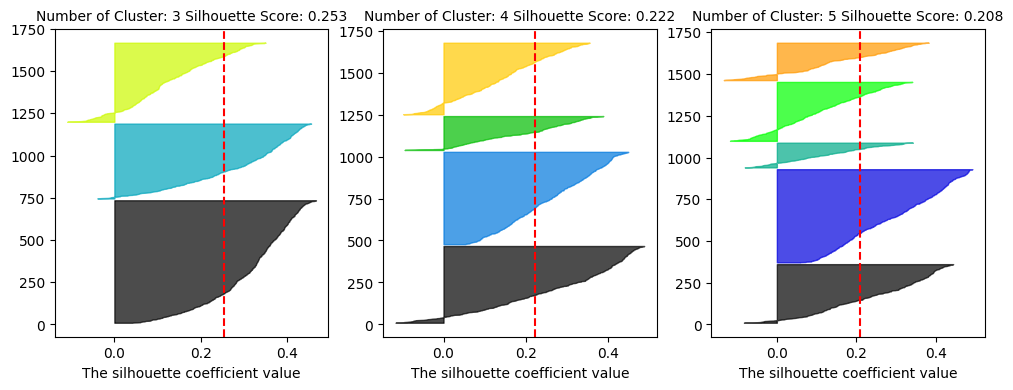

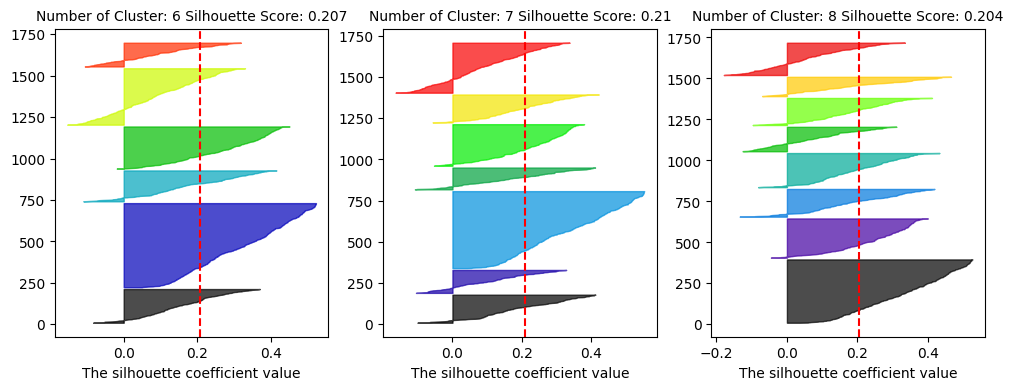

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crea una instància del MinMaxScaler
scaler = MinMaxScaler()

# Càlcul de mètriques internes

# Fit i transforma les característiques (X_features) amb MinMaxScaler
X_features = scaler.fit_transform(df_cleaned)

visualize_silhouette('KMeans', [3,4,5], X_features)
visualize_silhouette('KMeans', [6,7,8], X_features)

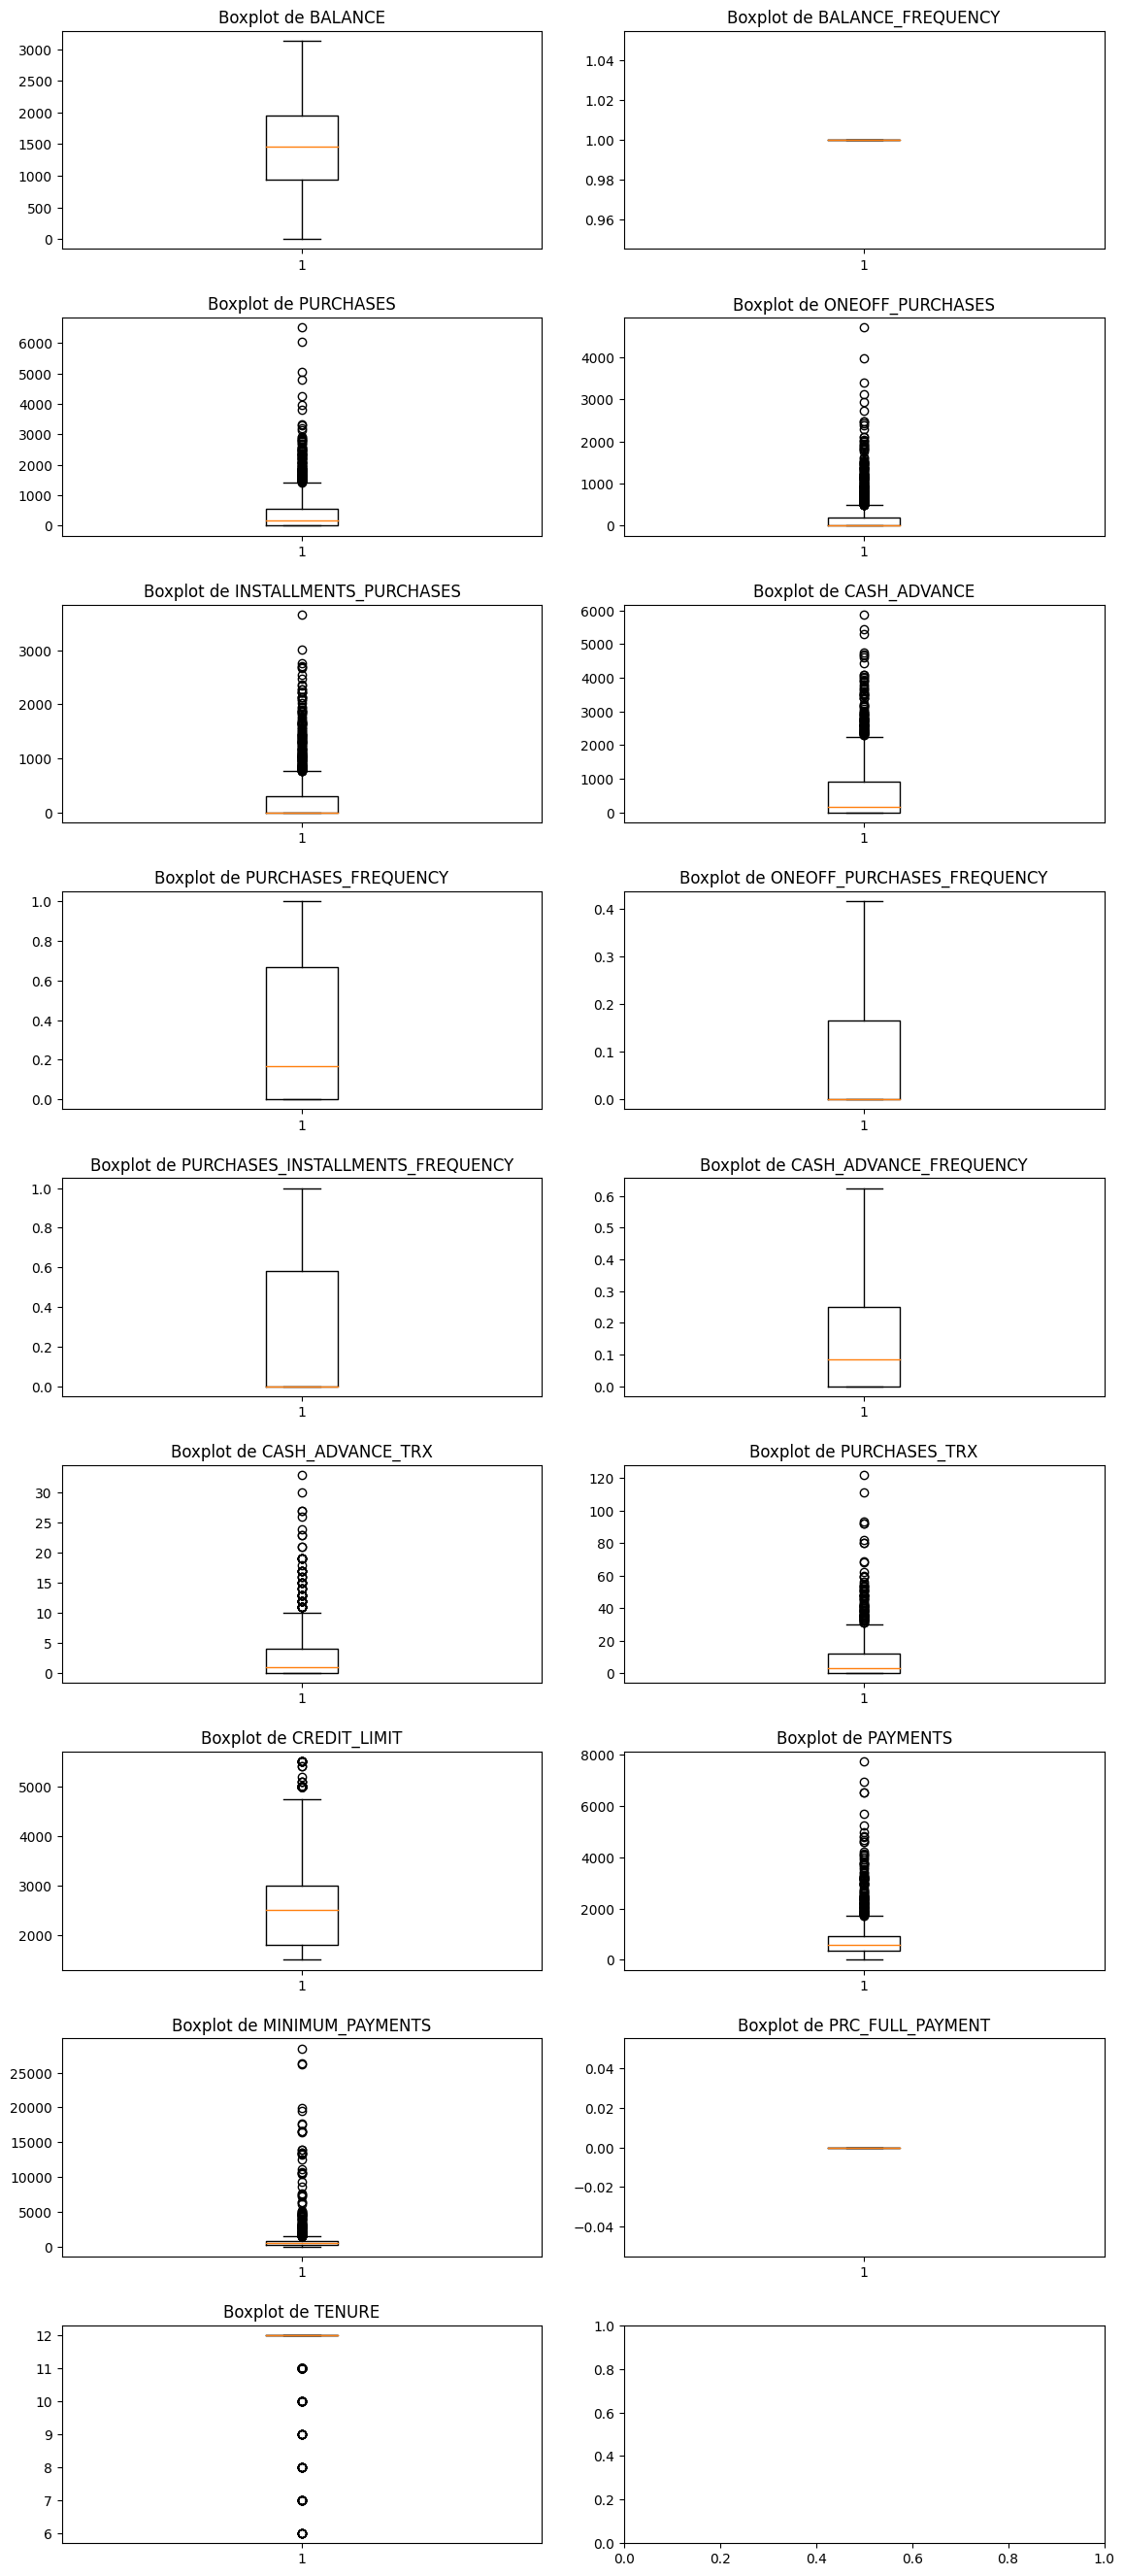

In [ ]:
# Detecció outliers
# Configurar la graella de subplots
num_subplots = len(col_num.columns)
rows = int(num_subplots / 2) + (num_subplots % 2)
fig, axs = plt.subplots(rows, 2, figsize=(12, 3 * rows))
fig.tight_layout(pad=3.0)

# Crear diagrames de caixa més petits i en una graella
for i, col in enumerate(col_num.columns):
    ax = axs[i // 2, i % 2] if num_subplots > 1 else axs
    ax.boxplot(df_cleaned[col])
    ax.set_title(f'Boxplot de {col}')

plt.show()

# Fase 6: Entrenament del model i realització de prediccions

In [ ]:
"""
n_clusters per a provar 4

n_init 10 l'algoritme K-Means s'iniciarà 10 vegades amb centroides inicials diferents,
i es seleccionarà el model que tingui la inèrcia (suma de les distàncies quadrades dins del clúster) més baixa

max_iter 500 l'algoritme K-Means intentarà ajustar els centroides fins a un màxim de 500 iteracions per cada inicialització.
Això pot ser útil en conjunts de dades on l'algoritme podria trigar més temps a convergir o on es vol limitar el temps d'execució

init k-means++ determina la manera com s'inicialitzen els centroids. En aquest cas és la inicialització predeterminada millorada

algoritme lloyd especifica l'algoritme utilitzat per calcular els clústers

Pot ser "k-means", "elkan". "Lloyd" equival a k-means intentarà seleccionar la millor opció basant-se en les dades d'entrada
No caldria és el per defecte
"""
kmeans = KMeans(n_clusters=8, n_init=10, init='k-means++', max_iter=500, random_state=42, algorithm='lloyd')
kmeans_labels = kmeans.fit_predict(X_features)
df_cleaned['kmeans_labels'] = kmeans_labels

In [ ]:
banc_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
4      817.714335           1.000000      16.00             16.00   
5     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8943     5.871712           0.500000      20.90             20.90   
8945    28.493517           1.000000     291.12              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
4                       0.00      0.000000             0.083333   
5                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8943                    0.00      0.000000             0.166667   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
4                       0.083333                          0.000000   
5                       0.000000                          0.583333   
...                          ...                               ...   
8943                    0.166667                          0.000000   
8945                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
4                   0.000000                 0              1        1200.0   
5                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8943                0.000000                 0              1         500.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  kmeans_labels  
0      201.802084        139.509787          0.000000      12              1  
1     4103.032597       1072.340217          0.222222      12              0  
2      622.066742        627.284787          0.000000      12              0  
4      678.334763        244.791237          0.000000      12              1  
5     1400.057770       2407.246035          0.000000      12              1  
...           ...               ...               ...     ...            ...  
8943    58.644883         43.4737

# Fase 7: Validació model

In [ ]:


# Calcula el coeficient de silhouette
silhouette = silhouette_score(X_features, df_cleaned['kmeans_labels'])
print(f"Silhouette Score: {silhouette}")

# Calcula el coeficient de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_features, df_cleaned['kmeans_labels'])
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calcula el coeficient de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_features, df_cleaned['kmeans_labels'])
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Obtenir l'inèrcia (SSE)
inertia = kmeans.inertia_

# Imprimeix l'inèrcia
print(f"Inèrcia (SSE): {inertia}")

Silhouette Score: 0.20700630954549806
Davies-Bouldin Score: 1.512468908655546
Calinski-Harabasz Score: 429.2069111619976
Inèrcia (SSE): 394.78610790413404


# Conclusió

Hem pogut comprobar que no hi ha dades duplicades.
CUST_ID es un identificador per tant s'ha d'esborrar
Després de mostrar totes les columbes amb boxplot he pogut observar que les columnes CREDIT_LIMIT y MINIMUM_PAYMENTS no han mostrat valors, per tant haig de fer accions al respecte. D'altres columnes com PURCHASES_FREQUENCY i PURCHASES_INSTALLMENTS_FREQUENCY no tenen outliers abans de elimniar els duplicats y valors nulls. La pérdua ha sigut mínima millorant la qualitat de les dades.

La primera execució ens dona unas métricas normals excepte la Inèrcia, que está molt disparada, aixó ens indica que es un mal model, per tant hem de realitzar algunes millores.

Aplicant una normalització de dades es comproba que la Inèrcia passa a tenir un rang més óptim, pero el silhouette pasa a ser negatiu i la metrica de Davies junt amb el de Calinski pasa a tenir un valor molt baix.

Encara no he modificat la columna de TENURE que podríem perfectament crear etiquetes per categoritzar aquesta.

Quan visualitzem les dades clusteritzades, podemo observar que els outliers estan afectant negativament ja que es veu com la barra va en sentit oposat, per tant a optimitzar!
grup d'outliers molt clars
* PRC_FULL_PAYMENT
* CREDIT_LIMIT
* CASH_ADVANCE_FREQUENCY
* ONEOFF_PURCHASES_FREQUENCY
* BALANCE
* BALANCE_FREQUENCY

grups de poques dades amb outliers, una mica dubtosos
* PURCHASES
* ONEOFF_PURCHASES
* INSTALLMENTS_PURCHASES
* CASH_ADVANCE
* CASH_ADVANCE_TRX
* PURCHASES_TRX
* PAYMENTS
* MINIMUM_PAYMENTS

Podría ser una categoría Si/No
* TENURE

Desp`rés d'eliminar alguns outliers hem millorat molt, passem a tocar els altres algoritmes. Aquests valors estan una mica dispersos:
* Davies-Bouldin Score: 1.512468908655546
* Calinski-Harabasz Score: 429.2069111619976


# Fase 3 Neteja de dades

In [7]:
def preparar_dades():
  df = pd.read_csv('/content/sample_data/IOC/IABD/M2/data/banc.csv')
  # Elimina valors null
  cleaned_df = df.dropna()
  print(f"before {len(df)} after {len(cleaned_df)}")
  df = cleaned_df

  # Comprovar duplicats
  duplicates = df[df.duplicated()]
  print (duplicates)
  if len(duplicates) > 0:
    # Drop files duplicades
    df = df.drop_duplicates()
  df = df.drop(['CUST_ID'], axis = 1)
  return df

In [ ]:
banc_df = preparar_dades()

before 8950 after 8636
Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


# Gràfics

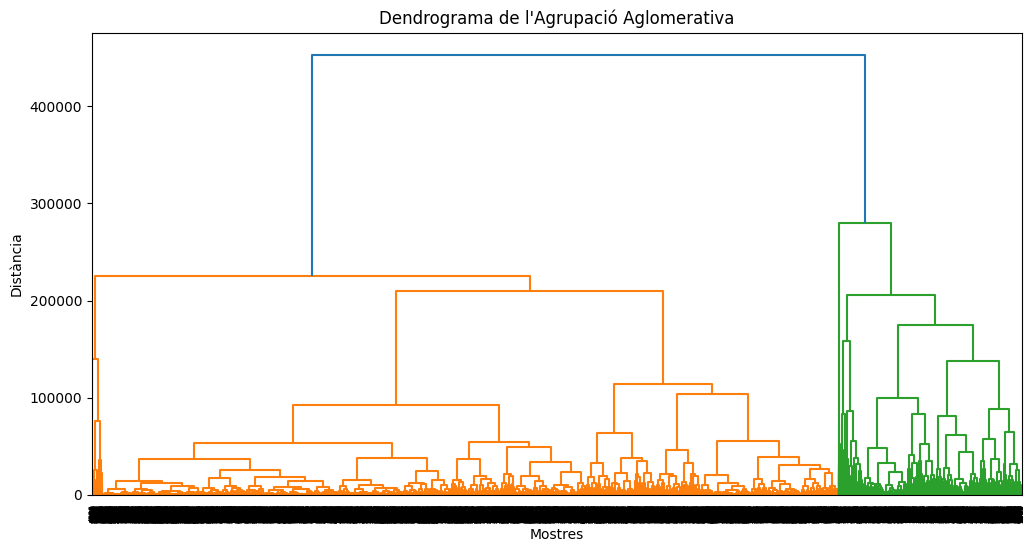

In [ ]:
# Càlcul de la matriu de vinculació
linkage_matrix = linkage(banc_df, method='ward')

# Visualització del dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma de l\'Agrupació Aglomerativa')
plt.xlabel('Mostres')
plt.ylabel('Distància')
plt.show()

# Execució model

In [ ]:
# Crea una instància del model d'agrupació aglomerativa
agglomerative_model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Entrena el model amb les dades d'entrada
clusters = agglomerative_model.fit_predict(banc_df)

# Afegir una nova columna amb els clústers assignats al DataFrame original
banc_df['Cluster'] = clusters

# Mostrar les primeres files del DataFrame amb la nova columna de clústers
print(banc_df.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

# Validació model

In [ ]:
# Càlcul de mètriques internes

# Calcula el coeficient de silhouette
silhouette = silhouette_score(banc_df, banc_df['Cluster'])
print(f"Silhouette Score: {silhouette}")

# Calcula el coeficient de Davies-Bouldin
davies_bouldin = davies_bouldin_score(banc_df, banc_df['Cluster'])
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calcula el coeficient de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(banc_df, banc_df['Cluster'])
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Silhouette Score: 0.5041027424802066
Davies-Bouldin Score: 1.0057231282066397
Calinski-Harabasz Score: 2193.631603710283


# Optimització


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Suposant que tens les dades X
# Ajusta els paràmetres segons la teva necessitat
model = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='manhattan')
labels = model.fit_predict(banc_df)

# Avalua el rendiment amb la puntuació de la silueta
silhouette_avg = silhouette_score(banc_df, labels)
print(f"Puntuació de la silueta: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Puntuació de la silueta: 0.8087584989956379


# Execució

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Suposant que tens les dades X
# Ajusta els paràmetres segons la teva necessitat
model = AgglomerativeClustering(n_clusters=4, linkage='average', affinity='manhattan')
labels = model.fit_predict(banc_df)

# Avalua el rendiment amb la puntuació de la silueta
silhouette_avg = silhouette_score(banc_df, labels)
print(f"Puntuació de la silueta: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Puntuació de la silueta: 0.8836563094944676


# Proba

In [ ]:
# Creació dels 4 clústers
cluster_0 = banc_df.loc[banc_df['Cluster']==0]
cluster_1 = banc_df.loc[banc_df['Cluster']==1]
cluster_2 = banc_df.loc[banc_df['Cluster']==2]
cluster_3 = banc_df.loc[banc_df['Cluster']==3]

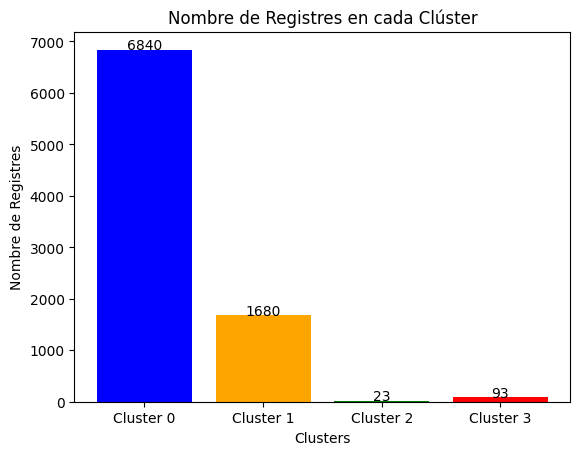

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suposant que tens un DataFrame anomenat banc_df amb la columna 'Cluster'
# i que ja has creat els clusters com tu has indicat
cluster_0 = banc_df.loc[banc_df['Cluster'] == 0]
cluster_1 = banc_df.loc[banc_df['Cluster'] == 1]
cluster_2 = banc_df.loc[banc_df['Cluster'] == 2]
cluster_3 = banc_df.loc[banc_df['Cluster'] == 3]

# Crear una llista amb els noms dels clústers i el nombre de registres en cada clúster
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
num_rows = [len(cluster_0), len(cluster_1), len(cluster_2), len(cluster_3)]

# Visualitzar el nombre de registres amb un diagrama de barres amb etiquetes
plt.bar(clusters, num_rows, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Clusters')
plt.ylabel('Nombre de Registres')
plt.title('Nombre de Registres en cada Clúster')

# Afegir etiquetes amb el nombre de registres a cada barra
for i, num_row in enumerate(num_rows):
    plt.text(i, num_row + 0.1, str(num_row), ha='center')

plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def visualize_continuous_vars(df, num_clusters):
    fig = make_subplots(
        rows=9, cols=2,
        subplot_titles=df.columns,
        row_titles=['']*9,
        column_widths=[0.5, 0.5],  # Ajusta les amplades relatives de les columnes
    )

    variables = df.columns

    for i, variable in enumerate(variables, start=1):
        row = (i - 1) // 2 + 1
        col = (i - 1) % 2 + 1

        fig.add_trace(
            go.Histogram(x=df[variable], name=f'{variable}', marker_color='lightblue'),
            row=row, col=col
        )

    fig.update_layout(
        height=1500,  # Ajusta l'altura segons sigui necessari
        width=1000,   # Ajusta l'amplada segons sigui necessari
        title_text=f"Distribució de Variables Contínues - Cluster {num_clusters}",
        template='simple_white'
    )

    fig.update_traces(
        marker_line_color='black',
        marker_line_width=1.5,
        opacity=0.8
    )

    # Ajusta l'espai entre les barres dels histogrames
    fig.update_layout(bargap=0.1)

    fig.show()

In [ ]:
visualize_continuous_vars(cluster_0,0)

In [ ]:
visualize_continuous_vars(cluster_2,2)

# Conclusió


Es veu una clara descompensasió a l'hora de formar els clusters

PRC_FULL_PAYMENT
CREDIT_LIMIT
CASH_ADVANCE_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
BALANCE
BALANCE_FREQUENCY

grups de poques dades amb outliers
* PURCHASES
* ONEOFF_PURCHASES
* INSTALLMENTS_PURCHASES
* CASH_ADVANCE
* CASH_ADVANCE_TRX
* PURCHASES_TRX
* PAYMENTS
* MINIMUM_PAYMENTS
* TENURE


# Fase 3: Neteja de dades

In [28]:
banc_df = preparar_dades()

before 8950 after 8636
Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


# Grafics

<Axes: xlabel='PAYMENTS', ylabel='BALANCE'>

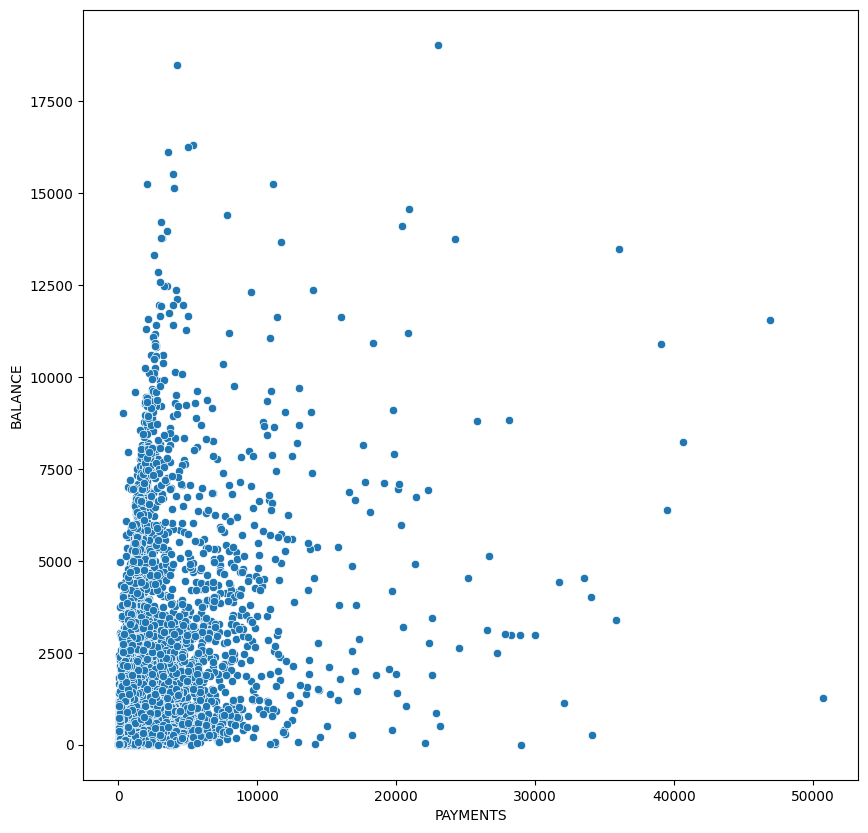

In [25]:
# Conversió a data frame
"""
Clusteritzar dades segons formes complexes que, a més, compten amb outliers.
"""


data = banc_df

# per exemple, fem un gráfic per interpolar els pagaments amb el balance, ja que son dos factors molt importants
plt.rcParams['figure.figsize'] = [10,10]
sns.scatterplot(
    data = data,
    x = 'PAYMENTS',
    y = 'BALANCE'
)

before 8950 after 8636
Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3243957631267321


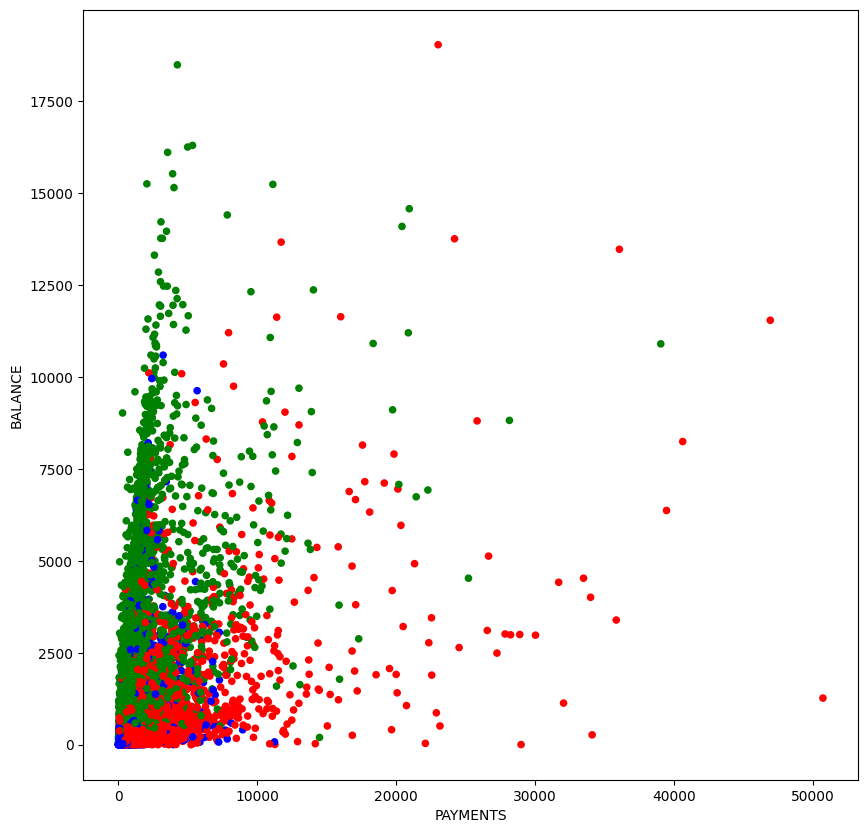

In [29]:
from sklearn.preprocessing import normalize
# K-means
"""
Kmeans ha fet una molt mala clusterització, ja que:

No ha aconseguit clusteritzar segons les formes complexes del model.
No ha tingut en compte que hi ha outliers, incloent-los en els diferents clústers.
"""
data_norm = normalize(preparar_dades())

preds = KMeans(n_clusters = 3, random_state =123).fit_predict(data_norm)

cols = {
  0: 'r',
  1: 'g',
  2: 'b'
}

data['kmeans_pred'] = [cols.get(pred) for pred in preds]
data.plot.scatter('PAYMENTS', 'BALANCE', c='kmeans_pred')

silhouette_avg = silhouette_score(data_norm, data['kmeans_pred'])
print(f"Silhouette Score: {silhouette_avg}")

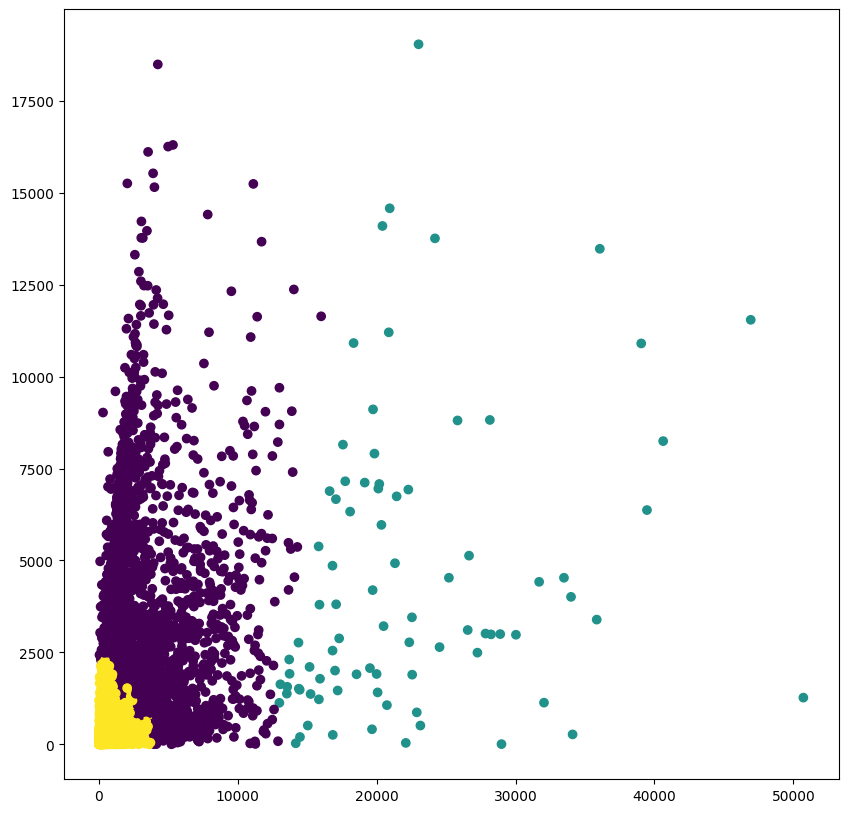

Silhouette Score: 0.48806960072787836


In [31]:
# Agglomerative
num_clusters = 3

# Crea una instància de l'algorisme d'aglomeració
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)

# Ajusta el model als teus dades
data['agglomerative'] = agglomerative.fit_predict(data[['PAYMENTS', 'BALANCE']])

# Visualitza els resultats
plt.scatter(data['PAYMENTS'], data['BALANCE'], c=data['agglomerative'])
plt.show()

silhouette_avg = silhouette_score(data[['PAYMENTS', 'BALANCE']], data['agglomerative'])
print(f"Silhouette Score: {silhouette_avg}")

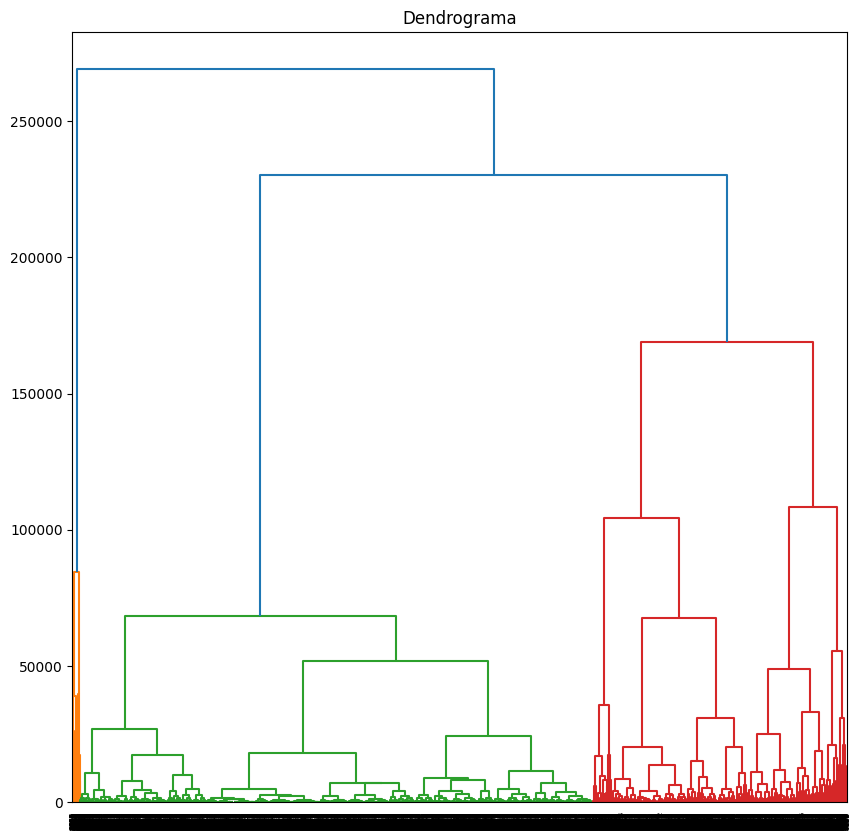

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Suposant que 'data' ja té les columnes 'PAYMENTS' i 'BALANCE'
# Especifica el nombre de clusters que vols
num_clusters = 3

# Crea una instància de l'algorisme d'aglomeració
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)

# Ajusta el model als teus dades
data['agglomerative'] = agglomerative.fit_predict(data[['PAYMENTS', 'BALANCE']])

# Crea una matriu de vinculació amb les dades
linkage_matrix = linkage(data[['PAYMENTS', 'BALANCE']], 'ward')

# Visualitza el dendrograma
dendrogram(linkage_matrix)
plt.title('Dendrograma')
plt.show()


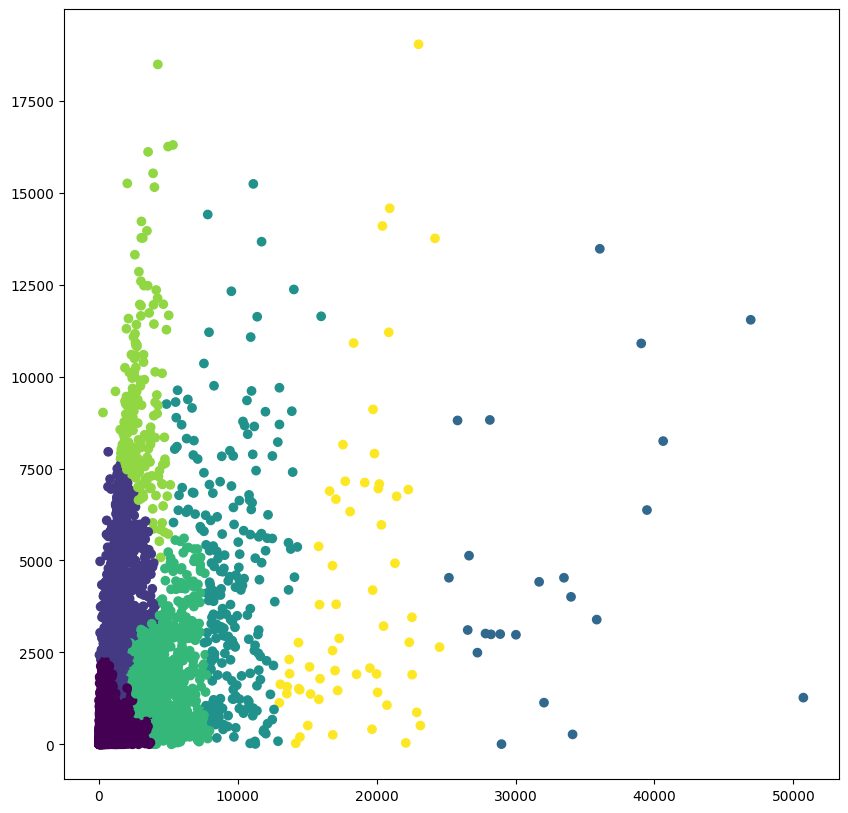

Silhouette Score: 0.5164941727771694


In [34]:
# Agglomerative
num_clusters = 7

# Crea una instància de l'algorisme d'aglomeració
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)

# Ajusta el model als teus dades
data['agglomerative'] = agglomerative.fit_predict(data[['PAYMENTS', 'BALANCE']])

# Visualitza els resultats
plt.scatter(data['PAYMENTS'], data['BALANCE'], c=data['agglomerative'])
plt.show()

silhouette_avg = silhouette_score(data[['PAYMENTS', 'BALANCE']], data['agglomerative'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.45451771322629964


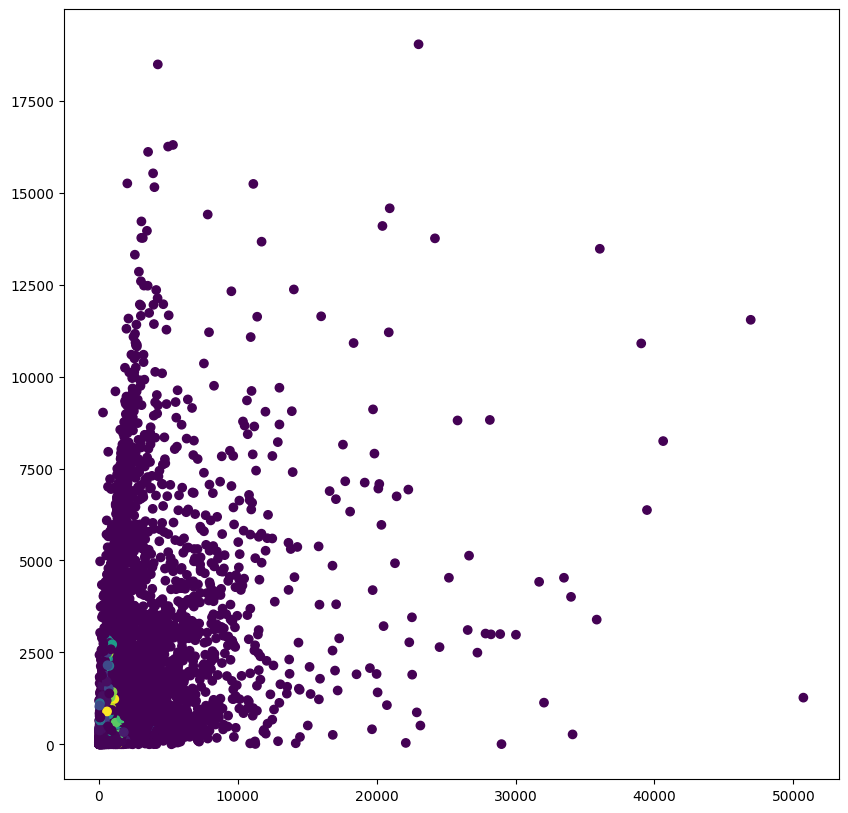

In [33]:
from sklearn.cluster import DBSCAN
# DBSCAN
"""
DBSCAN ha pogut clusteritzar, de manera adequada les dades, ja que:

Ha tingut en compte les formes complexes de les dades.
No ha considerat el soroll en cap dels clusters.
"""
data['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['PAYMENTS', 'BALANCE']])

plt.scatter(
    data['PAYMENTS'],
    data['BALANCE'],
    c = data['dbscan']
)

silhouette_avg = silhouette_score(data[['PAYMENTS', 'BALANCE']], data['dbscan'])
print(f"Silhouette Score: {silhouette_avg}")

# Conclusió Final

Després de moltes probes i neteja de dades hem pogut comprobar que la dispersió de dades esta afectant en el resultat.

Hem normalitzat i netejat les dades disperses, millorant el rendiment del model.

M'ha quedat pendet convertir en labels les columnes per veure si millora el rendiment.
* TERNURE ['Si','No']
* BALANCE_FREQUENCY ['Positiu','Negatiu']
* PURCHASE_FREQUENCY ['Frequent', 'Normal','Poc frequent']
* ONEOFF_PURCHASES_FREQUENCY ['Poc frequent', 'Normal','Molt frequent']
* PURCHASES_INSTALLAMENTS_FREQUENCY ['Poc frequent','normal, 'Molt frequent']
* CASH_ADVANCE_FREQUENCY ['Poc frequent','Normal','Moltfrequent']
* PRC_FULL_PAYMENT ['Poc frequent','Normal','Moltfrequent']


He pogut observar una forta agrupació de dades i una mala clusterització. S'ha de comprovar si millorarien si apliquessim les accions proposades anteriorment.

Estic segur que amb les columnes categoritzades, eliminant les dades disperses i normalitzant les dades obtendriía millors resultats, tot seguit quedaría el process de adjustar els hiperparametres, veure quina clusterització funciona millor amb la nova estructura de dades.

